# 필요 라이브러리 설치

In [1]:
!pip install jenkspy

# 필요 라이브러리들 불러오기

In [1]:
from geoband.API import *
GetCompasData('SBJ_1912_001', '4', 'train.csv')
import pandas as pd
import folium
import json
import geopandas as gpd
from geojson import Feature, FeatureCollection, Point, dump
import matplotlib.pyplot as plt
import jenkspy
import numpy as np
plt.rc("font", family = "Malgun Gothic")
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore') 


# 데이터 가져오기

In [2]:
anyang_pop = GetCompasData('SBJ_2009_002', '1', '01.안양시_격자별인구현황(전체).geojson')
anyang_senior=GetCompasData('SBJ_2009_002', '2', '02.안양시_격자별인구현황(고령).geojson')
anyang_product_pop=GetCompasData('SBJ_2009_002', '3', '03.안양시_격자별인구현황(생산가능인구).geojson')
anyang_junior=GetCompasData('SBJ_2009_002', '4', '04.안양시_격자별인구현황(유소년).geojson')
anyang_floating_pop=GetCompasData('SBJ_2009_002', '5', '05.안양시_월별_시간대별_유동인구.csv')
anyang_school=GetCompasData('SBJ_2009_002', '6', '06.안양시_학교현황.csv')
anyang_kin=GetCompasData('SBJ_2009_002', '7', '07.안양시_유치원현황.csv')
anyang_welfare=GetCompasData('SBJ_2009_002', '8', '08.안양시_복지회관_보건소현황.csv')
anyang_hos=GetCompasData('SBJ_2009_002', '9', '09.안양시_병원정보.csv')
anyang_factory=GetCompasData('SBJ_2009_002', '10', '10.안양시_공장등록현황.csv')
anyang_grid_factory=GetCompasData('SBJ_2009_002', '11', '11.안양시_공장등록현황_격자별.geojson')
anyang_dust=GetCompasData('SBJ_2009_002', '12', '12.안양시_비산먼지발생신고_사업장.csv')
anyang_bus_station=GetCompasData('SBJ_2009_002', '13', '13.안양시_버스정류장_위치정보.csv')
anyang_bus_people=GetCompasData('SBJ_2009_002', '14', '14.안양시_버스정류장별_이용객수.csv')
anyang_metro=GetCompasData('SBJ_2009_002', '15', '15.안양시_지하철역_위치정보.csv')
anyang_node=GetCompasData('SBJ_2009_002', '16', '16.안양시_노드정보.csv')
anyang_link=GetCompasData('SBJ_2009_002', '17', '17.안양시_링크정보.geojson')
anyang_traffic=GetCompasData('SBJ_2009_002', '18', '18.안양시_교통량정보.csv')
anyang_building=GetCompasData('SBJ_2009_002', '19', '19.안양시_도로명주소_건물.geojson')
anyang_grid_building=GetCompasData('SBJ_2009_002', '20', '20.안양시_건물연면적_격자별.geojson')
anyang_road=GetCompasData('SBJ_2009_002', '21', '21.안양시_도로명주소_도로.geojson')
anyang_sig=GetCompasData('SBJ_2009_002', '22', '22.안양시_법정경계(시군구).geojson')
anyang_emd=GetCompasData('SBJ_2009_002', '23', '23.안양시_법정경계(읍면동).geojson')
anyang_plan_space=GetCompasData('SBJ_2009_002', '26', '26.안양시_도시계획(공간시설).geojson')
anyang_plan_gym=GetCompasData('SBJ_2009_002', '27', '27.안양시_도시계획(공공문화체육시설).geojson')
anyang_plan_traffic=GetCompasData('SBJ_2009_002', '28', '28.안양시_도시계획(교통시설).geojson')
anyang_plan_welfare=GetCompasData('SBJ_2009_002', '29', '29.안양시_도시계획(보건위생시설).geojson')
anyang_plan_nature=GetCompasData('SBJ_2009_002', '30', '30.안양시_도시계획(환경기초시설).geojson')


In [3]:
anyang_pop = gpd.read_file('01.안양시_격자별인구현황(전체).geojson')
anyang_senior=gpd.read_file('02.안양시_격자별인구현황(고령).geojson')
anyang_product_pop=gpd.read_file('03.안양시_격자별인구현황(생산가능인구).geojson')
anyang_junior=gpd.read_file('04.안양시_격자별인구현황(유소년).geojson')
anyang_floating_pop=pd.read_csv('05.안양시_월별_시간대별_유동인구.csv')
anyang_school=pd.read_csv('06.안양시_학교현황.csv')
anyang_kin=pd.read_csv('07.안양시_유치원현황.csv')
anyang_welfare=pd.read_csv('08.안양시_복지회관_보건소현황.csv')
anyang_hos=pd.read_csv('09.안양시_병원정보.csv')
anyang_factory=pd.read_csv('10.안양시_공장등록현황.csv')
anyang_grid_factory=gpd.read_file('11.안양시_공장등록현황_격자별.geojson')
anyang_dust=pd.read_csv('12.안양시_비산먼지발생신고_사업장.csv')
anyang_bus_station=pd.read_csv('13.안양시_버스정류장_위치정보.csv')
anyang_bus_people=pd.read_csv('14.안양시_버스정류장별_이용객수.csv')
anyang_metro=pd.read_csv('15.안양시_지하철역_위치정보.csv')
anyang_node=pd.read_csv('16.안양시_노드정보.csv')
anyang_link=gpd.read_file('17.안양시_링크정보.geojson')
anyang_traffic=pd.read_csv('18.안양시_교통량정보.csv')
anyang_building=gpd.read_file('19.안양시_도로명주소_건물.geojson')
anyang_grid_building=gpd.read_file('20.안양시_건물연면적_격자별.geojson')
anyang_road=gpd.read_file('21.안양시_도로명주소_도로.geojson')
anyang_sig=gpd.read_file('22.안양시_법정경계(시군구).geojson')
anyang_emd=gpd.read_file('23.안양시_법정경계(읍면동).geojson')
anyang_plan_space=gpd.read_file('26.안양시_도시계획(공간시설).geojson')
anyang_plan_gym=gpd.read_file('27.안양시_도시계획(공공문화체육시설).geojson')
anyang_plan_traffic=gpd.read_file('28.안양시_도시계획(교통시설).geojson')
anyang_plan_welfare=gpd.read_file('29.안양시_도시계획(보건위생시설).geojson')
anyang_plan_nature=gpd.read_file('30.안양시_도시계획(환경기초시설).geojson')
anyang_commercial_grid = gpd.read_file('36.안양시_격자별상업지구여부.geojson')


# 함수 지정

In [4]:
def drawing_Choro(df, anyang_grid, title, legend):
    # 안양시 중심부의 위도, 경도 입니다.
    center = [37.403401,126.927953]

    # 맵이 center 에 위치하고, zoom 레벨은 16로 시작하는 맵 m을 만듭니다.
    m1 = folium.Map(
        location=center, 
        zoom_start=13,
        tiles='http://api.vworld.kr/req/wmts/1.0.0/3A4C3BB8-17F7-3973-B7C4-C92AB77AE7F9/Base/{z}/{y}/{x}.png',
        attr='My Data Attribution'
    )

    # Choropleth 레이어를 만들고, 맵 m에 추가합니다.
    folium.Choropleth(
        geo_data=anyang_grid,
        data=df,
        columns=('gid', 'point'),
        key_on='feature.properties.gid',
        legend_name = legend,
        fill_color='PuBuGn',
        line_opacity = 0.2,
    ).add_to(m1)

    # 맵 m을 출력합니다.
    m1.save(title)

# 격자 데이터 생성

In [5]:
#안양 격자만 생성
anyang_grid=anyang_pop.drop('val',axis=1)

# 미세먼지 센서 데이터 처리

## 취약계층 분포 데이터 전처리

In [6]:
#유소년과 노년층 count를 결합
anyang_senior=anyang_senior.rename({'val':'senior'},axis='columns')
anyang_senior_junior=pd.concat([anyang_senior,anyang_junior['val']],axis=1)
anyang_senior_junior['count']=anyang_senior_junior['senior']+anyang_senior_junior['val']
anyang_senior_junior=anyang_senior_junior.drop(['val','senior'],axis=1)
anyang_senior_junior=anyang_senior_junior[['gid','count','geometry']]
anyang_senior_junior

,gid,count,geometry
0,다사442343,NaN,"MULTIPOLYGON (((126.86950 37.40614, 126.86949 ..."
1,다사442344,NaN,"MULTIPOLYGON (((126.86949 37.40704, 126.86948 ..."
2,다사442345,NaN,"MULTIPOLYGON (((126.86948 37.40794, 126.86948 ..."
3,다사442347,NaN,"MULTIPOLYGON (((126.86947 37.40975, 126.86946 ..."
4,다사442348,NaN,"MULTIPOLYGON (((126.86946 37.41065, 126.86945 ..."
...,...,...,...
6112,다사541336,NaN,"MULTIPOLYGON (((126.98140 37.40038, 126.98139 ..."
6113,다사541337,NaN,"MULTIPOLYGON (((126.98139 37.40128, 126.98139 ..."
6114,다사542329,NaN,"MULTIPOLYGON (((126.98257 37.39407, 126.98257 ..."
6115,다사542335,NaN,"MULTIPOLYGON (((126.98254 37.39948, 126.98253 ..."


## 취약 계층 라벨링 

In [7]:
anyang_senior_junior=anyang_senior_junior.fillna(0)
breaks=jenkspy.jenks_breaks(anyang_senior_junior['count'],nb_class=5)
anyang_senior_junior['point']=pd.cut(anyang_senior_junior['count'],
                           bins=breaks,
                           labels=['1','2','3','4','5'],
                           include_lowest=True)
anyang_senior_junior['point']=anyang_senior_junior['point'].astype(int)

## 취약계층 분포도 시각화

In [8]:
drawing_Choro(anyang_senior_junior, anyang_grid, '취약 계층 분포도 .html', '취약 계층 분포 점수')

## 미세먼지 센서 공장 데이터 전처리

In [9]:
#미세먼지용 anyang_factory
anyang_factory_air_1=anyang_factory[anyang_factory['대기오염']=='1종']
anyang_factory_air_2=anyang_factory[anyang_factory['대기오염']=='2종']
anyang_factory_air_4=anyang_factory[anyang_factory['대기오염']=='4종']
anyang_factory_air_5=anyang_factory[anyang_factory['대기오염']=='5종']

In [10]:
# sjoin용 함수 생성
def sjoin(df):
    gdf_file=gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.lon,df.lat))
    gdf_file.crs="EPSG:4326"
    joined_grid_factory= gpd.sjoin(gdf_file,anyang_grid, op='within')
    grouped = joined_grid_factory.groupby('gid').size()
    result = grouped.to_frame().reset_index()
    result=pd.merge(anyang_grid,result, how='outer',on='gid')
    return result

In [11]:
#1종부터 5종까지 가중치를 다르게 하기 위하여 count를 따로 해준 후 최종 카운트에 반영한다.
sjoin_1=sjoin(anyang_factory_air_1)
sjoin_1.columns=['gid','geometry','count_1']
sjoin_2=sjoin(anyang_factory_air_2)
sjoin_2.columns=['gid','geometry','count_2']
sjoin_4=sjoin(anyang_factory_air_4)
sjoin_4.columns=['gid','geometry','count_4']
sjoin_5=sjoin(anyang_factory_air_5)
sjoin_5.columns=['gid','geometry','count_5']

In [12]:
#1종부터 5종까지 가중치를 순차적으로 준다.
sjoin_1['count_1']=sjoin_1['count_1'].map(lambda x:x*5)
sjoin_2['count_2']=sjoin_2['count_2'].map(lambda x:x*4)
sjoin_4['count_4']=sjoin_4['count_4'].map(lambda x:x*3)
sjoin_5['count_5']=sjoin_5['count_5'].map(lambda x:x*2)


In [13]:
#하나의 행으로 합치기
anyang_factory_air=pd.merge(sjoin_1,sjoin_2, how='outer',on='gid')
anyang_factory_air=pd.merge(anyang_factory_air,sjoin_4,how='outer',on='gid')
anyang_factory_air=pd.merge(anyang_factory_air,sjoin_5,how='outer',on='gid')
anyang_factory_air=anyang_factory_air.fillna(0)
anyang_factory_air['point']=anyang_factory_air['count_1']+anyang_factory_air['count_2']+anyang_factory_air['count_4']+anyang_factory_air['count_5']

In [14]:
anyang_factory_air=anyang_factory_air[['gid','point','geometry_x']]
anyang_factory_air=anyang_factory_air.iloc[:,:-1]
anyang_factory_air=anyang_factory_air.rename({'geometry_x':'geometry'},axis=1)
anyang_factory_air['point']=anyang_factory_air['point'].astype(int)
anyang_factory_air=anyang_factory_air.replace({'point': 0}, {'point': 1})


## 소각장의 유무와 공장 분포의 결합

In [15]:
anyang_plan_nature=anyang_plan_nature[anyang_plan_nature['DGM_NM'].isin(['중간처리시설','기타 폐기물처리시설'])]
joined_grid_factory= gpd.sjoin(anyang_plan_nature,anyang_grid, op='intersects')
grouped = joined_grid_factory.groupby('gid').size()
anyang_nature= grouped.to_frame().reset_index()
anyang_nature=pd.merge(anyang_grid,anyang_nature, how='outer',on='gid')
anyang_nature.columns=['gid','geometry','count']
anyang_nature=anyang_nature.fillna(0)
anyang_nature['count']=anyang_nature['count'].astype(int)

In [16]:
anyang_dust_factory=pd.merge(anyang_factory_air,anyang_nature,how='outer',on=['gid','geometry'])
anyang_dust_factory=anyang_dust_factory.rename({'point':'point_1'},axis=1)
anyang_dust_factory['point']=(anyang_dust_factory['point_1']+anyang_dust_factory['count'])*5/6
anyang_dust_factory=anyang_dust_factory.drop(['point_1','count'],axis=1)

## 소각장과 공장분포 시각화

In [17]:
drawing_Choro(anyang_dust_factory, anyang_grid,'미세먼지 공장,소각장 분포도.html', '미세먼지 공장,소각장 분포 점수')

## 미세먼지용 공장/소각장과 취약계층 분포도 데이터 결합

공장의 미세먼지 배출원 기여도가 25%에 해당하므로 가중치를 (2+2)/8배 더 준다.

In [18]:
anyang_factory_pop=pd.merge(anyang_dust_factory,anyang_senior_junior,how='outer',on=['gid','geometry'])
anyang_factory_pop=anyang_factory_pop.drop(['count'],axis=1)
anyang_factory_pop['point_y']=anyang_factory_pop['point_y'].astype(int)
anyang_factory_pop['point']=anyang_factory_pop['point_x']*1/2+anyang_factory_pop['point_y']*1/8
anyang_factory_pop=anyang_factory_pop.drop(['point_x','point_y'],axis=1)

## 교통량 데이터 전처리

In [19]:
anyang_traffic_sum=anyang_traffic.groupby('kslinkid')['sum_probecount'].sum()
anyang_traffic_sum=anyang_traffic_sum.to_frame().sort_values(by='sum_probecount',ascending=False)
anyang_traffic_sum.reset_index('kslinkid',inplace=True)
anyang_traffic_sum=anyang_traffic_sum.rename({'kslinkid':'LINK_ID'},axis=1)
anyang_link['LINK_ID']=anyang_link['LINK_ID'].astype(int)
#고속도로 제외 
anyang_link=anyang_link[anyang_link['ROAD_RANK'].isin(['103','104','105','106','107'])]
anyang_link=anyang_link.drop(anyang_link.columns[[range(1,13)]],axis=1)
#위치정보 합치기
anyang_traffic_link=pd.merge(anyang_traffic_sum,anyang_link,on='LINK_ID')
anyang_traffic_link=anyang_traffic_link[['LINK_ID','geometry','sum_probecount']]


In [20]:
#anyang_traffic_link를 qgis 툴을 사용해서 링크에 해당하는 격자에 교통량을 넣어줌
anyang_traffic_road=data1 = gpd.read_file('32.안양시_격자별교통량.geojson')
anyang_traffic_road=anyang_traffic_road.rename(
    {'Anyang_traffic_link_with_grid_Union_anyang_traffic_link_NoFreeWay_sum_probecount':'count'},axis=1)
anyang_traffic_road=anyang_traffic_road[['gid','geometry','count']]


In [21]:
#교통량 라벨링 해주기
breaks=jenkspy.jenks_breaks(anyang_traffic_road['count'],nb_class=5)
anyang_traffic_road['point']=pd.cut(anyang_traffic_road['count'],
                           bins=breaks,
                           labels=['1','2','3','4','5'],
                           include_lowest=True)
anyang_traffic_road=anyang_traffic_road.drop(['count'],axis=1)

## 미세먼지 센서 위치선정을 위한 점수 산출

교통량이 미세먼지 배출원 기여도에 가장 높기에 37.5%에 해당하므로 3/8배 가중치를 준다.

In [22]:
anyang_fine_dust=pd.merge(anyang_factory_pop,anyang_traffic_road,how='outer',on=['gid','geometry'])
anyang_fine_dust['point_y']=anyang_fine_dust['point_y'].astype(int)
anyang_fine_dust['point']=anyang_fine_dust['point_x']+anyang_fine_dust['point_y']*3/8
anyang_fine_dust=anyang_fine_dust.drop(['point_x','point_y'],axis=1)
anyang_fine_dust=anyang_fine_dust.sort_values(by='point',ascending=False)
anyang_fine_dust

,gid,geometry,point
4128,다사508325,"MULTIPOLYGON (((126.94419 37.39029, 126.94418 ...",2.916667
2006,다사479355,"MULTIPOLYGON (((126.91122 37.41717, 126.91121 ...",2.791667
1936,다사478356,"MULTIPOLYGON (((126.91008 37.41807, 126.91008 ...",2.791667
3862,다사504329,"MULTIPOLYGON (((126.93965 37.39388, 126.93964 ...",2.791667
2718,다사489342,"MULTIPOLYGON (((126.92261 37.40551, 126.92260 ...",2.666667
...,...,...,...
2232,다사482362,"MULTIPOLYGON (((126.91456 37.42350, 126.91455 ...",0.916667
2231,다사482361,"MULTIPOLYGON (((126.91457 37.42260, 126.91456 ...",0.916667
2230,다사482360,"MULTIPOLYGON (((126.91457 37.42170, 126.91457 ...",0.916667
2229,다사482359,"MULTIPOLYGON (((126.91458 37.42080, 126.91457 ...",0.916667


# 미세먼지 위치 리스트 시각화

In [23]:
drawing_Choro(anyang_fine_dust, anyang_grid,'미세먼지 센서 최종 .html','미세먼지 센서 최종')

## 미세먼지 top 40 선정

In [24]:
fine_dust_list=anyang_fine_dust.iloc[:40]

In [26]:
drawing_Choro(anyang_fine_dust, anyang_grid,'미세먼지 센서  top40 .html','미세먼지 센서 top40')

# 복합센서 데이터 처리

## 온도센서

## 열섬 현상을 고려하기 위하여 설치 기준을 격자별 고층 건물의 분포도로 설정

In [27]:
anyang_building_20=anyang_building[anyang_building['GRO_FLO_CO']>=20]

In [28]:
joined_building_grid= gpd.sjoin(anyang_building_20,anyang_grid, op='intersects')
grouped = joined_building_grid.groupby('gid').size()
anyang_building_20 = grouped.to_frame().reset_index()
anyang_building_20=pd.merge(anyang_grid,anyang_building_20, how='outer',on='gid')
anyang_building_20.columns=['gid','geometry','count']

## anyang_building 라벨링

In [29]:
anyang_building_20=anyang_building_20.fillna(0)
anyang_building_20['point']=pd.cut(anyang_building_20['count'],
                           bins=[0.,0.8, 1., 2., 4., 7.],
                           labels=['1','2','3','4','5'],
                           include_lowest=True)
anyang_building_20=anyang_building_20.drop('count',axis=1)
anyang_building_20['point']=anyang_building_20['point'].astype(int)

## 온도센서 시각화

In [30]:
drawing_Choro(anyang_building_20, anyang_grid,'온도 센서 .html','고층 건물 분포도')

## 유동인구센서

격자별 유동인구의 분포를 알아보기 위하여 설치

총 유동인구의 합

In [31]:
df = anyang_floating_pop.iloc[:,1:25] # 00시 ~ 24시까지의 유동인구의 합
anyang_floating_pop['총 유동인구현황']=df.sum(axis=1)
anyang_sum_floating_pop = anyang_floating_pop.drop(anyang_floating_pop.iloc[ : , 1:25], axis=1)
anyang_sum_floating_pop.columns = ['STD_YM','lon','lat', 'sum_floating_pop']

격자별 유동인구 카운트

In [32]:
anyang_sum_floating_pop=gpd.GeoDataFrame(anyang_sum_floating_pop,geometry=gpd.points_from_xy(anyang_sum_floating_pop.lon,anyang_sum_floating_pop.lat))
anyang_sum_floating_pop.crs="EPSG:4326"
anyang_sum_floating_pop= gpd.sjoin(anyang_sum_floating_pop,anyang_grid, op='within')
anyang_sum_floating_pop = anyang_sum_floating_pop.groupby('gid')['sum_floating_pop'].sum()
anyang_sum_floating_pop = anyang_sum_floating_pop.to_frame().reset_index()
anyang_sum_floating_pop=pd.merge(anyang_grid,anyang_sum_floating_pop, how='outer',on='gid')
anyang_sum_floating_pop

,gid,geometry,sum_floating_pop
0,다사442343,"MULTIPOLYGON (((126.86950 37.40614, 126.86949 ...",NaN
1,다사442344,"MULTIPOLYGON (((126.86949 37.40704, 126.86948 ...",0.19
2,다사442345,"MULTIPOLYGON (((126.86948 37.40794, 126.86948 ...",1.81
3,다사442347,"MULTIPOLYGON (((126.86947 37.40975, 126.86946 ...",NaN
4,다사442348,"MULTIPOLYGON (((126.86946 37.41065, 126.86945 ...",NaN
...,...,...,...
6112,다사541336,"MULTIPOLYGON (((126.98140 37.40038, 126.98139 ...",41.72
6113,다사541337,"MULTIPOLYGON (((126.98139 37.40128, 126.98139 ...",26.04
6114,다사542329,"MULTIPOLYGON (((126.98257 37.39407, 126.98257 ...",NaN
6115,다사542335,"MULTIPOLYGON (((126.98254 37.39948, 126.98253 ...",NaN


## 격자별 유동인구 라벨링

In [33]:
anyang_sum_floating_pop=anyang_sum_floating_pop.fillna(0)
breaks=jenkspy.jenks_breaks(anyang_sum_floating_pop['sum_floating_pop'],nb_class=5)
anyang_sum_floating_pop['point']=pd.cut(anyang_sum_floating_pop['sum_floating_pop'],
                           bins=breaks,
                           labels=['1','2','3','4','5'],
                           include_lowest=True)
anyang_sum_floating_pop['point']=anyang_sum_floating_pop['point'].astype(int)

## 유동인구 센서 시각화

In [34]:
drawing_Choro(anyang_sum_floating_pop, anyang_grid,'유동인구 센서 .html','유동인구 분포도')

## 광센서

격자별 야간 유동인구 카운트

In [35]:
night_time = anyang_floating_pop[['TMST_00', 'TMST_01', 'TMST_02', 'TMST_03','TMST_22',
       'TMST_23']]
anyang_floating_pop["night_sum_floating_pop"] = night_time.sum(axis=1)
night_anyang_floating_pop=anyang_floating_pop[['STD_YM','lon','lat','night_sum_floating_pop']]


In [36]:
night_anyang_floating_pop=gpd.GeoDataFrame(night_anyang_floating_pop,geometry=gpd.points_from_xy(night_anyang_floating_pop.lon,night_anyang_floating_pop.lat))
night_anyang_floating_pop.crs="EPSG:4326"
night_anyang_floating_pop= gpd.sjoin(night_anyang_floating_pop,anyang_grid, op='within')
night_anyang_floating_pop = night_anyang_floating_pop.groupby('gid')['night_sum_floating_pop'].sum()
night_anyang_floating_pop = night_anyang_floating_pop.to_frame().reset_index()
night_anyang_floating_pop=pd.merge(anyang_grid,night_anyang_floating_pop, how='outer',on='gid')

격자별 야간 유동인구 라벨링

In [37]:
night_anyang_floating_pop=night_anyang_floating_pop.fillna(0)
breaks=jenkspy.jenks_breaks(night_anyang_floating_pop['night_sum_floating_pop'],nb_class=5)
night_anyang_floating_pop['point']=pd.cut(night_anyang_floating_pop['night_sum_floating_pop'],
                           bins=breaks,
                           labels=['1','2','3','4','5'],
                           include_lowest=True)
night_anyang_floating_pop

,gid,geometry,night_sum_floating_pop,point
0,다사442343,"MULTIPOLYGON (((126.86950 37.40614, 126.86949 ...",0.00,1
1,다사442344,"MULTIPOLYGON (((126.86949 37.40704, 126.86948 ...",0.00,1
2,다사442345,"MULTIPOLYGON (((126.86948 37.40794, 126.86948 ...",0.11,1
3,다사442347,"MULTIPOLYGON (((126.86947 37.40975, 126.86946 ...",0.00,1
4,다사442348,"MULTIPOLYGON (((126.86946 37.41065, 126.86945 ...",0.00,1
...,...,...,...,...
6112,다사541336,"MULTIPOLYGON (((126.98140 37.40038, 126.98139 ...",6.95,1
6113,다사541337,"MULTIPOLYGON (((126.98139 37.40128, 126.98139 ...",1.88,1
6114,다사542329,"MULTIPOLYGON (((126.98257 37.39407, 126.98257 ...",0.00,1
6115,다사542335,"MULTIPOLYGON (((126.98254 37.39948, 126.98253 ...",0.00,1


안양시 격자별 상업지구 유무 데이터 전처리(격자별 상업지구 데이터는 qgis를 통해 처리)

In [38]:
anyang_floating_pop_incommercial=pd.merge(night_anyang_floating_pop,
                                          anyang_commercial_grid,how='outer',on='gid')
anyang_floating_pop_incommercial['point']=anyang_floating_pop_incommercial['point'].astype(int)

거주지인 곳은 빛공해의 원인이 되는 곳이 아니기 때문에 point를 0으로 부여

In [39]:
anyang_floating_pop_incommercial.loc[anyang_floating_pop_incommercial['Intersection_M']==0,'point']=0

## 광센서 시각화

In [40]:
drawing_Choro(anyang_floating_pop_incommercial, anyang_grid,'광센서 .html','야간 시간 유동인구 ')

## 소음/진동센서

## 소음/진동센서에 대한 공장 데이터

In [41]:
anyang_factory_nv=anyang_factory[anyang_factory['소음/진동여부']=='유']
anyang_factory_nv=sjoin(anyang_factory_nv)
anyang_factory_nv.columns=['gid','geometry','count']

In [42]:
#소음.진동 분포도 라벨링 해주기
anyang_factory_nv=anyang_factory_nv.fillna(0)
anyang_factory_nv['point']=pd.cut(anyang_factory_nv['count'],
                           bins=[0.,0.8, 1., 2., 3., 4.],
                           labels=['1','2','3','4','5'],
                           include_lowest=True)
anyang_factory_nv['point']=anyang_factory_nv['point'].astype(int)

## 격자별 버스정류장 이용객 데이터

In [43]:
anyang_bus_people['count']=anyang_bus_people['전체 승차 건수']+anyang_bus_people['전체 하차 건수']
anyang_bus_people=anyang_bus_people[['정류소ID','count']]
anyang_bus_people=anyang_bus_people.rename({'정류소ID':'STATION_ID'},axis=1)
anyang_bus_people=anyang_bus_people.groupby(['STATION_ID']).sum().reset_index()
anyang_bus_station_people = anyang_bus_people.merge(anyang_bus_station, on='STATION_ID')

In [44]:
anyang_bus_station_people=gpd.GeoDataFrame(anyang_bus_station_people,geometry=gpd.points_from_xy(anyang_bus_station_people.lon,anyang_bus_station_people.lat))
anyang_bus_station_people.crs=r"EPSG:4326"
anyang_bus_station_people= gpd.sjoin(anyang_bus_station_people,anyang_grid, op='within')
anyang_bus_station_people = anyang_bus_station_people.groupby('gid')['count'].sum()
anyang_bus_station_people = anyang_bus_station_people.to_frame().reset_index()
anyang_bus_station_people=pd.merge(anyang_grid,anyang_bus_station_people, how='outer',on='gid')

## 격자별 버스정류장 이용객 데이터 라벨링

In [45]:
anyang_bus_station_people=anyang_bus_station_people.fillna(0)
breaks=jenkspy.jenks_breaks(anyang_bus_station_people['count'],nb_class=5)
anyang_bus_station_people['point']=pd.cut(anyang_bus_station_people['count'],
                           bins=breaks,
                           labels=['1','2','3','4','5'],
                           include_lowest=True)
anyang_bus_station_people=anyang_bus_station_people.drop('count',axis=1)

## 교통량 데이터는 미세먼지에서 처리

In [46]:
anyang_traffic_road

,gid,geometry,point
0,다사442343,"MULTIPOLYGON (((126.86950 37.40614, 126.86949 ...",1
1,다사442344,"MULTIPOLYGON (((126.86949 37.40704, 126.86948 ...",1
2,다사442345,"MULTIPOLYGON (((126.86948 37.40794, 126.86948 ...",1
3,다사442347,"MULTIPOLYGON (((126.86947 37.40975, 126.86946 ...",1
4,다사442348,"MULTIPOLYGON (((126.86946 37.41065, 126.86945 ...",1
...,...,...,...
6112,다사541336,"MULTIPOLYGON (((126.98140 37.40038, 126.98139 ...",1
6113,다사541337,"MULTIPOLYGON (((126.98139 37.40128, 126.98139 ...",1
6114,다사542329,"MULTIPOLYGON (((126.98257 37.39407, 126.98257 ...",1
6115,다사542335,"MULTIPOLYGON (((126.98254 37.39948, 126.98253 ...",1


## 버스이용객,공장,교통량에 대하여 가중치를 부여

## 기사에 따라서 공장;버스이용객:교통량=4:1:1의 가중치를 부여

## 버스이용객과 교통량 데이터 결합

In [47]:
anyang_transport=pd.merge(anyang_traffic_road,anyang_bus_station_people,how='outer',on=['gid','geometry'])
anyang_transport['point_x']=anyang_transport['point_x'].astype(int)
anyang_transport['point_y']=anyang_transport['point_y'].astype(int)
anyang_transport['point_1']=anyang_transport['point_x']*1/6+anyang_transport['point_y']*1/6
anyang_transport=anyang_transport.drop(['point_x','point_y'],axis=1)

## 공장 데이터와 결합

In [48]:
anyang_nv=pd.merge(anyang_factory_nv,anyang_transport,how='outer',on=['gid','geometry'])
anyang_nv=anyang_nv.rename({'point':'point_2'},axis=1)
anyang_nv['point']=anyang_nv['point_2']*2/3+anyang_nv['point_1']
anyang_nv=anyang_nv.drop(['count','point_1','point_2'],axis=1)

## 소음,진동 센서 시각화

In [49]:
drawing_Choro(anyang_nv, anyang_grid,'소음,진동 센서.html','소음,진동')

# 복합센서 위치선정을 위한 점수 산출

In [50]:
anyang_nv.columns = ['gid', 'geometry', 'noise_vibration']
anyang_building_20.columns=['gid','geometry','temperature']
anyang_fine_dust.columns=['gid','geometry','dust']
anyang_floating_pop_incommercial=anyang_floating_pop_incommercial.rename({'point':'night'},axis=1)
anyang_sum_floating_pop=anyang_sum_floating_pop.rename({'point':'floating'},axis=1)

In [51]:
anyang_complex= anyang_nv.merge(anyang_building_20, how = 'inner',on = "gid")
anyang_complex= anyang_complex.merge(anyang_fine_dust, how = 'inner',on = "gid")
anyang_complex= anyang_complex.merge(anyang_floating_pop_incommercial, how = 'inner',on = "gid")
anyang_complex= anyang_complex.merge(anyang_sum_floating_pop, how = 'inner',on = "gid")

# 복합센서 점수 최종 합산

In [52]:
#가중치가 전부 같음으로 point에 0.2를 곱해서 더해준다.
anyang_complex['point']=(anyang_complex['noise_vibration']+anyang_complex['night']+anyang_complex['temperature']+anyang_complex['dust']+anyang_complex['floating'])*0.2
anyang_complex=anyang_complex.rename({'geometry_x_x':'geometry'},axis=1)
anyang_complex=anyang_complex[['gid','geometry','point']]
anyang_complex=anyang_complex.sort_values(by='point',ascending=False)


In [53]:
drawing_Choro(anyang_complex, anyang_grid,'복합센서 최종.html','복합센서 최종')

# 복합센서 top80 선정

In [54]:
complex_list=anyang_complex.iloc[:80]
complex_list

,gid,geometry,point
5359,다사523332,"MULTIPOLYGON (((126.96109 37.39668, 126.96108 ...",2.858333
4514,다사513323,"MULTIPOLYGON (((126.94985 37.38852, 126.94985 ...",2.783333
4596,다사514324,"MULTIPOLYGON (((126.95098 37.38942, 126.95097 ...",2.716667
5268,다사522329,"MULTIPOLYGON (((126.95998 37.39397, 126.95997 ...",2.716667
6036,다사536336,"MULTIPOLYGON (((126.97575 37.40035, 126.97575 ...",2.700000
...,...,...,...
5528,다사525328,"MULTIPOLYGON (((126.96338 37.39308, 126.96337 ...",2.058333
2711,다사489335,"MULTIPOLYGON (((126.92266 37.39920, 126.92265 ...",2.050000
5064,다사520298,"MULTIPOLYGON (((126.95792 37.36602, 126.95792 ...",2.041667
2714,다사489338,"MULTIPOLYGON (((126.92264 37.40191, 126.92263 ...",2.033333


# 복합센서 top80 시각화

In [55]:
drawing_Choro(complex_list, anyang_grid,'복합센서 top 80.html','복합센서')

# 생활권으로 나누기

In [56]:
anyang_pop_in_dong = gpd.sjoin(anyang_pop, anyang_emd, how = 'left', op = 'intersects')
anyang_pop_in_dong = anyang_pop_in_dong.drop_duplicates(['gid'])
anyang_pop_in_dong = anyang_pop_in_dong.fillna(0)
anyang_pop_in_dong

,gid,val,geometry,index_right,EMD_CD,EMD_KOR_NM
0,다사442343,0.0,"MULTIPOLYGON (((126.86950 37.40614, 126.86949 ...",2.0,41171103,박달동
1,다사442344,0.0,"MULTIPOLYGON (((126.86949 37.40704, 126.86948 ...",2.0,41171103,박달동
2,다사442345,0.0,"MULTIPOLYGON (((126.86948 37.40794, 126.86948 ...",2.0,41171103,박달동
3,다사442347,0.0,"MULTIPOLYGON (((126.86947 37.40975, 126.86946 ...",2.0,41171103,박달동
4,다사442348,0.0,"MULTIPOLYGON (((126.86946 37.41065, 126.86945 ...",2.0,41171103,박달동
...,...,...,...,...,...,...
6112,다사541336,0.0,"MULTIPOLYGON (((126.98140 37.40038, 126.98139 ...",4.0,41173102,관양동
6113,다사541337,0.0,"MULTIPOLYGON (((126.98139 37.40128, 126.98139 ...",4.0,41173102,관양동
6114,다사542329,0.0,"MULTIPOLYGON (((126.98257 37.39407, 126.98257 ...",5.0,41173103,평촌동
6115,다사542335,0.0,"MULTIPOLYGON (((126.98254 37.39948, 126.98253 ...",4.0,41173102,관양동


### 2030년 안양도시기본계획에 따라 지역 생활권으로 분리
석수 박달 생활권 seoksu-bakdal<br>
안양 명학 생활권 anyang_myeonghak<br>
비산 관양 생활권 bisan-gwanyang<br>
평촌 호계 생활권 pyeongchon-hogye<br>

#### 해당 지역 생활권역은 행정동기준이지만, 
#### 데이터 분석을 위해 법정동경계로 나누어 진행하였음

In [57]:
# 석수 박달 생활권의 인구밀도
anyang_pop_in_seoksu_bakdal = anyang_pop_in_dong[
    anyang_pop_in_dong["EMD_KOR_NM"].isin(['박달동','석수동'])]
# 안양 명학 생활권의 인구밀드
anyang_pop_in_anyang_myeonghak = anyang_pop_in_dong[
    anyang_pop_in_dong["EMD_KOR_NM"].isin(['안양동'])
]
# 비산 관양 생활권의 인구밀드
anyang_pop_in_bisan_gwanyang = anyang_pop_in_dong[
    anyang_pop_in_dong["EMD_KOR_NM"].isin(['비산동','관양동'])
]
# 평촌 호계 생활권의 인구밀드
anyang_pop_in_pyeongchon_hogye = anyang_pop_in_dong[
    anyang_pop_in_dong["EMD_KOR_NM"].isin(['평촌동','호계동'])
]

# 미세먼지 센서를 지역생활권으로 나누어 위치 선정
### 각 지역의 생활권 미세먼지 센서의 개수는 그 지역의 인구밀도의 비율로 정함

In [58]:
# 석수 박달 생활권의 인구밀도 
anyang_pop_in_seoksu_bakdal_density = anyang_pop_in_seoksu_bakdal['val'].sum()/anyang_pop_in_seoksu_bakdal['val'].count()
anyang_pop_in_seoksu_bakdal_density

# 안양 명학 생활권의 인구밀도 
anyang_pop_in_anyang_myeonghak_density = anyang_pop_in_anyang_myeonghak['val'].sum()/anyang_pop_in_anyang_myeonghak['val'].count()
anyang_pop_in_anyang_myeonghak_density

# 비산 관양 생활권의 인구밀도 
anyang_pop_in_bisan_gwanyang_density = anyang_pop_in_bisan_gwanyang['val'].sum()/anyang_pop_in_bisan_gwanyang['val'].count()
anyang_pop_in_bisan_gwanyang_density

# 평촌 호계 생활권의 인구밀도 
anyang_pop_in_pyeongchon_hogye_density = anyang_pop_in_pyeongchon_hogye['val'].sum()/anyang_pop_in_pyeongchon_hogye['val'].count()
anyang_pop_in_pyeongchon_hogye_density

197.4419225634179

### 각 생활권 별 인구밀도 비율

In [59]:
sum_density = anyang_pop_in_seoksu_bakdal_density+anyang_pop_in_anyang_myeonghak_density+anyang_pop_in_bisan_gwanyang_density+anyang_pop_in_pyeongchon_hogye_density
sum_density

443.7579526040331

In [60]:
anyang_pop_in_seoksu_bakdal_density/sum_density*100
# 비율 결과 : 10.562653966953622

anyang_pop_in_anyang_myeonghak_density/sum_density*100
# 비율 결과 : 19.448072934587465

anyang_pop_in_bisan_gwanyang_density/sum_density*100
# 비율 결과 : 25.496116095907993

anyang_pop_in_pyeongchon_hogye_density/sum_density*100
# 비율 결과 : 44.49315700255091

seoksu_bakdal = (anyang_pop_in_seoksu_bakdal_density/sum_density*100).round()
# 11.0 %
anyang_myeonghak = (anyang_pop_in_anyang_myeonghak_density/sum_density*100).round()
# 19.0 %
bisan_gwanyang = (anyang_pop_in_bisan_gwanyang_density/sum_density*100).round()
# 25.0 %
pyeongchon_hogye = (anyang_pop_in_pyeongchon_hogye_density/sum_density*100).round()
# 44.0 %

# 11 : 19 : 25 : 44 => 정수의 값을 주기위해서 값을 조정
# 10 : 20 : 25: 45 => 2 : 4 : 5 : 9 
# 미세먼지 센서 
# 석수 박달 지역 2/20 => 4개
# 안양 명학 지역 4/20 => 8개
# 비산 관양 지역 5/20 => 10개
# 평촌 호계 지역 9/20 => 18개 

### 석수 박달 지역 생활권 미세먼지 센서 위치

In [61]:
# 석수 박달 지역 생활권 미세먼지 센서 위치
anyang_pop_in_seoksu_bakdal_dust = anyang_pop_in_seoksu_bakdal.merge(anyang_fine_dust, on = 'gid')
anyang_pop_in_seoksu_bakdal_dust = anyang_pop_in_seoksu_bakdal_dust.sort_values(by = ["dust"], ascending = False)
anyang_pop_in_seoksu_bakdal_top4 = anyang_pop_in_seoksu_bakdal_dust.iloc[:4]
anyang_pop_in_seoksu_bakdal_top4

,gid,val,geometry_x,index_right,EMD_CD,EMD_KOR_NM,geometry_y,dust
1398,다사479355,751.0,"MULTIPOLYGON (((126.91122 37.41717, 126.91121 ...",1.0,41171102,석수동,"MULTIPOLYGON (((126.91122 37.41717, 126.91121 ...",2.791667
1360,다사478356,727.0,"MULTIPOLYGON (((126.91008 37.41807, 126.91008 ...",1.0,41171102,석수동,"MULTIPOLYGON (((126.91008 37.41807, 126.91008 ...",2.791667
431,다사458343,0.0,"MULTIPOLYGON (((126.88758 37.40624, 126.88757 ...",2.0,41171103,박달동,"MULTIPOLYGON (((126.88758 37.40624, 126.88757 ...",2.583333
571,다사461343,0.0,"MULTIPOLYGON (((126.89097 37.40625, 126.89096 ...",2.0,41171103,박달동,"MULTIPOLYGON (((126.89097 37.40625, 126.89096 ...",2.583333


In [62]:
# 안양 명학 지역 생활권 미세먼지 센서 위치
anyang_pop_in_anyang_myeonghak_dust = anyang_pop_in_anyang_myeonghak.merge(anyang_fine_dust, on = 'gid')
anyang_pop_in_anyang_myeonghak_dust = anyang_pop_in_anyang_myeonghak_dust.sort_values(by = ["dust"], ascending = False)
anyang_pop_in_anyang_myeonghak_top8 = anyang_pop_in_anyang_myeonghak_dust.iloc[:8]
anyang_pop_in_anyang_myeonghak_top8

,gid,val,geometry_x,index_right,EMD_CD,EMD_KOR_NM,geometry_y,dust
1028,다사489342,438.0,"MULTIPOLYGON (((126.92261 37.40551, 126.92260 ...",0.0,41171101,안양동,"MULTIPOLYGON (((126.92261 37.40551, 126.92260 ...",2.666667
854,다사485351,240.0,"MULTIPOLYGON (((126.91803 37.41360, 126.91802 ...",0.0,41171101,안양동,"MULTIPOLYGON (((126.91803 37.41360, 126.91802 ...",2.541667
1074,다사490341,192.0,"MULTIPOLYGON (((126.92375 37.40462, 126.92374 ...",0.0,41171101,안양동,"MULTIPOLYGON (((126.92375 37.40462, 126.92374 ...",2.541667
897,다사486349,160.0,"MULTIPOLYGON (((126.91917 37.41180, 126.91916 ...",0.0,41171101,안양동,"MULTIPOLYGON (((126.91917 37.41180, 126.91916 ...",2.541667
984,다사488344,0.0,"MULTIPOLYGON (((126.92147 37.40731, 126.92146 ...",0.0,41171101,안양동,"MULTIPOLYGON (((126.92147 37.40731, 126.92146 ...",2.416667
1119,다사491339,0.0,"MULTIPOLYGON (((126.92489 37.40282, 126.92488 ...",0.0,41171101,안양동,"MULTIPOLYGON (((126.92489 37.40282, 126.92488 ...",2.416667
1211,다사493337,0.0,"MULTIPOLYGON (((126.92716 37.40103, 126.92716 ...",0.0,41171101,안양동,"MULTIPOLYGON (((126.92716 37.40103, 126.92716 ...",2.416667
1212,다사493338,0.0,"MULTIPOLYGON (((126.92716 37.40193, 126.92715 ...",0.0,41171101,안양동,"MULTIPOLYGON (((126.92716 37.40193, 126.92715 ...",2.416667


In [63]:
# 비산 관양 지역 생활권 미세먼지 센서 위치

anyang_pop_in_bisan_gwanyang_dust = anyang_pop_in_bisan_gwanyang.merge(anyang_fine_dust, on = 'gid')
anyang_pop_in_bisan_gwanyang_dust = anyang_pop_in_bisan_gwanyang_dust.sort_values(by=['dust'], ascending = False)
anyang_pop_in_bisan_gwanyang_top10 = anyang_pop_in_bisan_gwanyang_dust.iloc[:10]
anyang_pop_in_bisan_gwanyang_top10

,gid,val,geometry_x,index_right,EMD_CD,EMD_KOR_NM,geometry_y,dust
181,다사504329,815.0,"MULTIPOLYGON (((126.93965 37.39388, 126.93964 ...",3.0,41173101,비산동,"MULTIPOLYGON (((126.93965 37.39388, 126.93964 ...",2.791667
100,다사500332,438.0,"MULTIPOLYGON (((126.93511 37.39656, 126.93510 ...",3.0,41173101,비산동,"MULTIPOLYGON (((126.93511 37.39656, 126.93510 ...",2.666667
205,다사505328,306.0,"MULTIPOLYGON (((126.94078 37.39298, 126.94078 ...",3.0,41173101,비산동,"MULTIPOLYGON (((126.94078 37.39298, 126.94078 ...",2.541667
293,다사508327,233.0,"MULTIPOLYGON (((126.94418 37.39209, 126.94417 ...",3.0,41173101,비산동,"MULTIPOLYGON (((126.94418 37.39209, 126.94417 ...",2.541667
62,다사498333,106.0,"MULTIPOLYGON (((126.93284 37.39745, 126.93283 ...",3.0,41173101,비산동,"MULTIPOLYGON (((126.93284 37.39745, 126.93283 ...",2.541667
206,다사505329,249.0,"MULTIPOLYGON (((126.94078 37.39388, 126.94077 ...",3.0,41173101,비산동,"MULTIPOLYGON (((126.94078 37.39388, 126.94077 ...",2.541667
0,다사494337,252.0,"MULTIPOLYGON (((126.92829 37.40103, 126.92829 ...",3.0,41173101,비산동,"MULTIPOLYGON (((126.92829 37.40103, 126.92829 ...",2.541667
234,다사506328,168.0,"MULTIPOLYGON (((126.94191 37.39298, 126.94190 ...",3.0,41173101,비산동,"MULTIPOLYGON (((126.94191 37.39298, 126.94190 ...",2.541667
182,다사504330,8.0,"MULTIPOLYGON (((126.93964 37.39478, 126.93963 ...",3.0,41173101,비산동,"MULTIPOLYGON (((126.93964 37.39478, 126.93963 ...",2.416667
207,다사505330,554.0,"MULTIPOLYGON (((126.94077 37.39478, 126.94076 ...",3.0,41173101,비산동,"MULTIPOLYGON (((126.94077 37.39478, 126.94076 ...",2.416667


In [64]:
# 평촌 호계 지역 생활권 미세먼지 센서 위치
anyang_pop_in_pyeongchon_hogye_dust = anyang_pop_in_pyeongchon_hogye.merge(anyang_fine_dust, on = 'gid')
anyang_pop_in_pyeongchon_hogye_dust = anyang_pop_in_pyeongchon_hogye_dust.sort_values(by=['dust'], ascending = False)
anyang_pop_in_pyeongchon_hogye_dust_top18 = anyang_pop_in_pyeongchon_hogye_dust.iloc[:18]
anyang_pop_in_pyeongchon_hogye_dust_top18

,gid,val,geometry_x,index_right,EMD_CD,EMD_KOR_NM,geometry_y,dust
56,다사508325,1306.0,"MULTIPOLYGON (((126.94419 37.39029, 126.94418 ...",6.0,41173104,호계동,"MULTIPOLYGON (((126.94419 37.39029, 126.94418 ...",2.916667
29,다사507316,0.0,"MULTIPOLYGON (((126.94312 37.38217, 126.94311 ...",6.0,41173104,호계동,"MULTIPOLYGON (((126.94312 37.38217, 126.94311 ...",2.583333
347,다사520298,1044.0,"MULTIPOLYGON (((126.95792 37.36602, 126.95792 ...",6.0,41173104,호계동,"MULTIPOLYGON (((126.95792 37.36602, 126.95792 ...",2.541667
272,다사517313,737.0,"MULTIPOLYGON (((126.95444 37.37952, 126.95443 ...",6.0,41173104,호계동,"MULTIPOLYGON (((126.95444 37.37952, 126.95443 ...",2.416667
192,다사514317,513.0,"MULTIPOLYGON (((126.95102 37.38311, 126.95101 ...",6.0,41173104,호계동,"MULTIPOLYGON (((126.95102 37.38311, 126.95101 ...",2.291667
167,다사513319,358.0,"MULTIPOLYGON (((126.94988 37.38491, 126.94987 ...",6.0,41173104,호계동,"MULTIPOLYGON (((126.94988 37.38491, 126.94987 ...",2.291667
99,다사510323,491.0,"MULTIPOLYGON (((126.94646 37.38850, 126.94646 ...",6.0,41173104,호계동,"MULTIPOLYGON (((126.94646 37.38850, 126.94646 ...",2.166667
121,다사511322,148.0,"MULTIPOLYGON (((126.94760 37.38760, 126.94759 ...",6.0,41173104,호계동,"MULTIPOLYGON (((126.94760 37.38760, 126.94759 ...",2.166667
324,다사519305,157.0,"MULTIPOLYGON (((126.95675 37.37232, 126.95674 ...",6.0,41173104,호계동,"MULTIPOLYGON (((126.95675 37.37232, 126.95674 ...",2.166667
246,다사516315,324.0,"MULTIPOLYGON (((126.95329 37.38132, 126.95329 ...",6.0,41173104,호계동,"MULTIPOLYGON (((126.95329 37.38132, 126.95329 ...",2.166667


In [65]:
# 지역별 미세먼지 센서 리스트 합치기
anyang_dust_sensor_all = pd.concat([anyang_pop_in_pyeongchon_hogye_dust_top18,
                                    anyang_pop_in_bisan_gwanyang_top10,
                                    anyang_pop_in_anyang_myeonghak_top8,
                                    anyang_pop_in_seoksu_bakdal_top4])
anyang_dust_sensor_all.head(5)

,gid,val,geometry_x,index_right,EMD_CD,EMD_KOR_NM,geometry_y,dust
56,다사508325,1306.0,"MULTIPOLYGON (((126.94419 37.39029, 126.94418 ...",6.0,41173104,호계동,"MULTIPOLYGON (((126.94419 37.39029, 126.94418 ...",2.916667
29,다사507316,0.0,"MULTIPOLYGON (((126.94312 37.38217, 126.94311 ...",6.0,41173104,호계동,"MULTIPOLYGON (((126.94312 37.38217, 126.94311 ...",2.583333
347,다사520298,1044.0,"MULTIPOLYGON (((126.95792 37.36602, 126.95792 ...",6.0,41173104,호계동,"MULTIPOLYGON (((126.95792 37.36602, 126.95792 ...",2.541667
272,다사517313,737.0,"MULTIPOLYGON (((126.95444 37.37952, 126.95443 ...",6.0,41173104,호계동,"MULTIPOLYGON (((126.95444 37.37952, 126.95443 ...",2.416667
192,다사514317,513.0,"MULTIPOLYGON (((126.95102 37.38311, 126.95101 ...",6.0,41173104,호계동,"MULTIPOLYGON (((126.95102 37.38311, 126.95101 ...",2.291667


# 생활권역에 따른 미세먼지 센서 배치

In [66]:
center = [37.407690,126.973238]

# 맵이 center 에 위치하고, zoom 레벨은 13로 시작하는 맵 m을 만듭니다.
m = folium.Map(location=center, zoom_start=13,
              tiles='http://api.vworld.kr/req/wmts/1.0.0/3A4C3BB8-17F7-3973-B7C4-C92AB77AE7F9/Base/{z}/{y}/{x}.png',
        attr='My Data Attribution')

# Choropleth 레이어를 만들고, 맵 m에 추가합니다.
folium.Choropleth(
    geo_data=anyang_grid,
    data=anyang_dust_sensor_all,
    columns=('gid', 'dust'),
    key_on='feature.properties.gid',
    fill_color='PuRd',
    legend_name='미세먼지 센서 최종',
).add_to(m)

# 맵 m을 출력합니다.
m.save('미세먼지 센서(권역별세분화) .html')

# 미세먼지 센서 위치제외하고 복합센서 위치 선정

In [67]:
A = anyang_dust_sensor_all['gid']
complex_nodust=anyang_complex.drop(anyang_complex[anyang_complex["gid"].isin(A)].index)
complex_nodust

,gid,geometry,point
5359,다사523332,"MULTIPOLYGON (((126.96109 37.39668, 126.96108 ...",2.858333
4514,다사513323,"MULTIPOLYGON (((126.94985 37.38852, 126.94985 ...",2.783333
4596,다사514324,"MULTIPOLYGON (((126.95098 37.38942, 126.95097 ...",2.716667
5268,다사522329,"MULTIPOLYGON (((126.95998 37.39397, 126.95997 ...",2.716667
6036,다사536336,"MULTIPOLYGON (((126.97575 37.40035, 126.97575 ...",2.700000
...,...,...,...
2266,다사483324,"MULTIPOLYGON (((126.91596 37.38925, 126.91595 ...",0.783333
2265,다사483323,"MULTIPOLYGON (((126.91596 37.38835, 126.91596 ...",0.783333
2264,다사483322,"MULTIPOLYGON (((126.91597 37.38745, 126.91596 ...",0.783333
2263,다사483321,"MULTIPOLYGON (((126.91598 37.38655, 126.91597 ...",0.783333


### 11 : 19 : 25 : 44 => 정수의 값을 주기위해서 값을 조정
### 10 : 20 : 25: 45 => 2 : 4 : 5 : 9 
## 복합센서 선정 
### 석수 박달 지역 2/20 => 8개
### 안양 명학 지역 4/20 => 16개
### 비산 관양 지역 5/20 => 20개
### 평촌 호계 지역 9/20 => 36개 

In [68]:
# 석수 박달 지역 2/20 => 8개

anyang_pop_in_seoksu_bakdal_complex = anyang_pop_in_seoksu_bakdal.merge(complex_nodust, on = 'gid')
anyang_pop_in_seoksu_bakdal_complex = anyang_pop_in_seoksu_bakdal_complex.sort_values(by = ["point"], ascending = False)
anyang_pop_in_seoksu_bakdal_top8 = anyang_pop_in_seoksu_bakdal_complex.iloc[:8]

anyang_pop_in_seoksu_bakdal_top8

,gid,val,geometry_x,index_right,EMD_CD,EMD_KOR_NM,geometry_y,point
1461,다사481352,1005.0,"MULTIPOLYGON (((126.91350 37.41448, 126.91349 ...",1.0,41171102,석수동,"MULTIPOLYGON (((126.91350 37.41448, 126.91349 ...",2.083333
1080,다사471373,0.0,"MULTIPOLYGON (((126.90205 37.43335, 126.90204 ...",1.0,41171102,석수동,"MULTIPOLYGON (((126.90205 37.43335, 126.90204 ...",1.941667
1520,다사483353,134.0,"MULTIPOLYGON (((126.91575 37.41539, 126.91575 ...",1.0,41171102,석수동,"MULTIPOLYGON (((126.91575 37.41539, 126.91575 ...",1.908333
997,다사470339,1558.0,"MULTIPOLYGON (((126.90116 37.40270, 126.90116 ...",2.0,41171103,박달동,"MULTIPOLYGON (((126.90116 37.40270, 126.90116 ...",1.883333
1460,다사481351,1240.0,"MULTIPOLYGON (((126.91351 37.41358, 126.91350 ...",1.0,41171102,석수동,"MULTIPOLYGON (((126.91351 37.41358, 126.91350 ...",1.883333
1431,다사480352,1155.0,"MULTIPOLYGON (((126.91237 37.41447, 126.91236 ...",1.0,41171102,석수동,"MULTIPOLYGON (((126.91237 37.41447, 126.91236 ...",1.883333
1179,다사474339,950.0,"MULTIPOLYGON (((126.90568 37.40272, 126.90568 ...",2.0,41171103,박달동,"MULTIPOLYGON (((126.90568 37.40272, 126.90568 ...",1.858333
996,다사470338,528.0,"MULTIPOLYGON (((126.90117 37.40180, 126.90116 ...",2.0,41171103,박달동,"MULTIPOLYGON (((126.90117 37.40180, 126.90116 ...",1.833333


In [69]:
# 안양 명학 지역 2/20 => 16개

anyang_pop_in_anyang_myeonghak_complex = anyang_pop_in_anyang_myeonghak.merge(complex_nodust, on = 'gid')
anyang_pop_in_anyang_myeonghak_complex = anyang_pop_in_anyang_myeonghak_complex.sort_values(by = ["point"], ascending = False)
anyang_pop_in_anyang_myeonghak_top16 = anyang_pop_in_anyang_myeonghak_complex.iloc[:16]

anyang_pop_in_anyang_myeonghak_top16

,gid,val,geometry_x,index_right,EMD_CD,EMD_KOR_NM,geometry_y,point
1384,다사499318,60.0,"MULTIPOLYGON (((126.93407 37.38393, 126.93406 ...",0.0,41171101,안양동,"MULTIPOLYGON (((126.93407 37.38393, 126.93406 ...",2.450000
1020,다사489337,335.0,"MULTIPOLYGON (((126.92264 37.40100, 126.92264 ...",0.0,41171101,안양동,"MULTIPOLYGON (((126.92264 37.40100, 126.92264 ...",2.275000
1357,다사498318,531.0,"MULTIPOLYGON (((126.93294 37.38393, 126.93294 ...",0.0,41171101,안양동,"MULTIPOLYGON (((126.93294 37.38393, 126.93294 ...",2.208333
926,다사487334,117.0,"MULTIPOLYGON (((126.92041 37.39829, 126.92040 ...",0.0,41171101,안양동,"MULTIPOLYGON (((126.92041 37.39829, 126.92040 ...",2.191667
927,다사487335,17.0,"MULTIPOLYGON (((126.92040 37.39919, 126.92039 ...",0.0,41171101,안양동,"MULTIPOLYGON (((126.92040 37.39919, 126.92039 ...",2.191667
928,다사487336,26.0,"MULTIPOLYGON (((126.92039 37.40009, 126.92039 ...",0.0,41171101,안양동,"MULTIPOLYGON (((126.92039 37.40009, 126.92039 ...",2.125000
882,다사486335,107.0,"MULTIPOLYGON (((126.91927 37.39919, 126.91926 ...",0.0,41171101,안양동,"MULTIPOLYGON (((126.91927 37.39919, 126.91926 ...",2.125000
883,다사486336,10.0,"MULTIPOLYGON (((126.91926 37.40009, 126.91926 ...",0.0,41171101,안양동,"MULTIPOLYGON (((126.91926 37.40009, 126.91926 ...",2.091667
1383,다사499317,9.0,"MULTIPOLYGON (((126.93408 37.38303, 126.93407 ...",0.0,41171101,안양동,"MULTIPOLYGON (((126.93408 37.38303, 126.93407 ...",2.091667
975,다사488337,0.0,"MULTIPOLYGON (((126.92151 37.40100, 126.92151 ...",0.0,41171101,안양동,"MULTIPOLYGON (((126.92151 37.40100, 126.92151 ...",2.083333


In [70]:
# 비산 관양 지역 5/20 => 20개

anyang_pop_in_bisan_gwanyang_complex = anyang_pop_in_bisan_gwanyang.merge(complex_nodust, on = 'gid')
anyang_pop_in_bisan_gwanyang_complex = anyang_pop_in_bisan_gwanyang_complex.sort_values(by = ["point"], ascending = False)
anyang_pop_in_bisan_gwangyang_top20 = anyang_pop_in_bisan_gwanyang_complex.iloc[:20]

anyang_pop_in_bisan_gwangyang_top20

,gid,val,geometry_x,index_right,EMD_CD,EMD_KOR_NM,geometry_y,point
1004,다사523332,996.0,"MULTIPOLYGON (((126.96109 37.39668, 126.96108 ...",4.0,41173102,관양동,"MULTIPOLYGON (((126.96109 37.39668, 126.96108 ...",2.858333
947,다사522329,407.0,"MULTIPOLYGON (((126.95998 37.39397, 126.95997 ...",4.0,41173102,관양동,"MULTIPOLYGON (((126.95998 37.39397, 126.95997 ...",2.716667
1429,다사536336,67.0,"MULTIPOLYGON (((126.97575 37.40035, 126.97575 ...",4.0,41173102,관양동,"MULTIPOLYGON (((126.97575 37.40035, 126.97575 ...",2.700000
381,다사511323,0.0,"MULTIPOLYGON (((126.94759 37.38850, 126.94759 ...",3.0,41173101,비산동,"MULTIPOLYGON (((126.94759 37.38850, 126.94759 ...",2.691667
1005,다사523333,1724.0,"MULTIPOLYGON (((126.96108 37.39758, 126.96108 ...",4.0,41173102,관양동,"MULTIPOLYGON (((126.96108 37.39758, 126.96108 ...",2.683333
1430,다사536337,9.0,"MULTIPOLYGON (((126.97575 37.40125, 126.97574 ...",4.0,41173102,관양동,"MULTIPOLYGON (((126.97575 37.40125, 126.97574 ...",2.600000
892,다사521329,69.0,"MULTIPOLYGON (((126.95885 37.39397, 126.95884 ...",4.0,41173102,관양동,"MULTIPOLYGON (((126.95885 37.39397, 126.95884 ...",2.600000
1054,다사524328,13.0,"MULTIPOLYGON (((126.96225 37.39308, 126.96224 ...",4.0,41173102,관양동,"MULTIPOLYGON (((126.96225 37.39308, 126.96224 ...",2.583333
461,다사513325,58.0,"MULTIPOLYGON (((126.94984 37.39032, 126.94983 ...",3.0,41173101,비산동,"MULTIPOLYGON (((126.94984 37.39032, 126.94983 ...",2.583333
43,다사497334,333.0,"MULTIPOLYGON (((126.93170 37.39834, 126.93170 ...",3.0,41173101,비산동,"MULTIPOLYGON (((126.93170 37.39834, 126.93170 ...",2.566667


In [71]:
# 평촌 호계 지역 9/20 => 36개 
anyang_pop_in_pyeongchon_hogye_complex = anyang_pop_in_pyeongchon_hogye.merge(complex_nodust, on = 'gid')
anyang_pop_in_pyeongchon_hogye_complex = anyang_pop_in_pyeongchon_hogye_complex.sort_values(by=['point'], ascending = False)
anyang_pop_in_pyeongchon_hogye_complex_top36 = anyang_pop_in_pyeongchon_hogye_complex.iloc[:36]
anyang_pop_in_pyeongchon_hogye_complex_top36

,gid,val,geometry_x,index_right,EMD_CD,EMD_KOR_NM,geometry_y,point
165,다사513323,0.0,"MULTIPOLYGON (((126.94985 37.38852, 126.94985 ...",6.0,41173104,호계동,"MULTIPOLYGON (((126.94985 37.38852, 126.94985 ...",2.783333
190,다사514324,0.0,"MULTIPOLYGON (((126.95098 37.38942, 126.95097 ...",6.0,41173104,호계동,"MULTIPOLYGON (((126.95098 37.38942, 126.95097 ...",2.716667
166,다사513324,0.0,"MULTIPOLYGON (((126.94985 37.38942, 126.94984 ...",6.0,41173104,호계동,"MULTIPOLYGON (((126.94985 37.38942, 126.94984 ...",2.683333
217,다사515325,7.0,"MULTIPOLYGON (((126.95210 37.39033, 126.95209 ...",6.0,41173104,호계동,"MULTIPOLYGON (((126.95210 37.39033, 126.95209 ...",2.583333
245,다사516325,16.0,"MULTIPOLYGON (((126.95323 37.39033, 126.95322 ...",6.0,41173104,호계동,"MULTIPOLYGON (((126.95323 37.39033, 126.95322 ...",2.583333
141,다사512323,0.0,"MULTIPOLYGON (((126.94872 37.38851, 126.94872 ...",6.0,41173104,호계동,"MULTIPOLYGON (((126.94872 37.38851, 126.94872 ...",2.525000
271,다사517325,279.0,"MULTIPOLYGON (((126.95436 37.39034, 126.95435 ...",6.0,41173104,호계동,"MULTIPOLYGON (((126.95436 37.39034, 126.95435 ...",2.383333
216,다사515324,62.0,"MULTIPOLYGON (((126.95210 37.38943, 126.95210 ...",6.0,41173104,호계동,"MULTIPOLYGON (((126.95210 37.38943, 126.95210 ...",2.216667
244,다사516324,245.0,"MULTIPOLYGON (((126.95323 37.38943, 126.95323 ...",6.0,41173104,호계동,"MULTIPOLYGON (((126.95323 37.38943, 126.95323 ...",2.208333
381,다사521317,0.0,"MULTIPOLYGON (((126.95893 37.38315, 126.95892 ...",6.0,41173104,호계동,"MULTIPOLYGON (((126.95893 37.38315, 126.95892 ...",2.200000


# 생활권역에 따른 복합 센서 위치 합산

In [72]:
anyang_complex_sensor_all = pd.concat([anyang_pop_in_seoksu_bakdal_top8,
                                    anyang_pop_in_anyang_myeonghak_top16,
                                    anyang_pop_in_bisan_gwangyang_top20,
                                    anyang_pop_in_pyeongchon_hogye_complex_top36])
anyang_complex_sensor_all

,gid,val,geometry_x,index_right,EMD_CD,EMD_KOR_NM,geometry_y,point
1461,다사481352,1005.0,"MULTIPOLYGON (((126.91350 37.41448, 126.91349 ...",1.0,41171102,석수동,"MULTIPOLYGON (((126.91350 37.41448, 126.91349 ...",2.083333
1080,다사471373,0.0,"MULTIPOLYGON (((126.90205 37.43335, 126.90204 ...",1.0,41171102,석수동,"MULTIPOLYGON (((126.90205 37.43335, 126.90204 ...",1.941667
1520,다사483353,134.0,"MULTIPOLYGON (((126.91575 37.41539, 126.91575 ...",1.0,41171102,석수동,"MULTIPOLYGON (((126.91575 37.41539, 126.91575 ...",1.908333
997,다사470339,1558.0,"MULTIPOLYGON (((126.90116 37.40270, 126.90116 ...",2.0,41171103,박달동,"MULTIPOLYGON (((126.90116 37.40270, 126.90116 ...",1.883333
1460,다사481351,1240.0,"MULTIPOLYGON (((126.91351 37.41358, 126.91350 ...",1.0,41171102,석수동,"MULTIPOLYGON (((126.91351 37.41358, 126.91350 ...",1.883333
...,...,...,...,...,...,...,...,...
270,다사517324,534.0,"MULTIPOLYGON (((126.95436 37.38944, 126.95436 ...",6.0,41173104,호계동,"MULTIPOLYGON (((126.95436 37.38944, 126.95436 ...",1.866667
459,다사524295,735.0,"MULTIPOLYGON (((126.96246 37.36333, 126.96245 ...",6.0,41173104,호계동,"MULTIPOLYGON (((126.96246 37.36333, 126.96245 ...",1.858333
37,다사507325,735.0,"MULTIPOLYGON (((126.94306 37.39029, 126.94305 ...",6.0,41173104,호계동,"MULTIPOLYGON (((126.94306 37.39029, 126.94305 ...",1.858333
383,다사521319,426.0,"MULTIPOLYGON (((126.95892 37.38495, 126.95891 ...",6.0,41173104,호계동,"MULTIPOLYGON (((126.95892 37.38495, 126.95891 ...",1.850000


# 생활권역에 따른 복합센서 위치 시각화

In [73]:
center = [37.407690,126.973238]

# 맵이 center 에 위치하고, zoom 레벨은 11로 시작하는 맵 m을 만듭니다.
m3 = folium.Map(location=center, zoom_start=13,
                tiles='http://api.vworld.kr/req/wmts/1.0.0/3A4C3BB8-17F7-3973-B7C4-C92AB77AE7F9/Base/{z}/{y}/{x}.png',
        attr='My Data Attribution')

# Choropleth 레이어를 만들고, 맵 m에 추가합니다.
folium.Choropleth(
    geo_data=anyang_grid,
    data=anyang_complex_sensor_all,
    columns=('gid', 'point'),
    key_on='feature.properties.gid',
    fill_color='PuRd',
    legend_name='복합 센서 최종'
).add_to(m3)

# 맵 m을 출력합니다.
m3.save('복합센서(권역별세분화).html')

# 생활권역에 따른 미세먼지/복합 센서 합산

In [74]:
sensor = pd.concat([anyang_complex_sensor_all,anyang_dust_sensor_all])

In [75]:
sensor = sensor.drop(['val','geometry_x', 'index_right', 'EMD_CD','point', 'dust'], axis=1)
sensor.columns = ['gid','EMD_KOR_NM','geometry']
A = sensor['gid']
sensor_grid = anyang_grid[anyang_grid['gid'].isin(A)]

# 생활권역에 따른 미세먼지/복합 센서 시각화

In [76]:
center = [37.407690,126.973238]

# 맵이 center 에 위치하고, zoom 레벨은 11로 시작하는 맵 m을 만듭니다.
m1 = folium.Map(
    location=center, 
    zoom_start=13,
    tiles='http://api.vworld.kr/req/wmts/1.0.0/3A4C3BB8-17F7-3973-B7C4-C92AB77AE7F9/Base/{z}/{y}/{x}.png',
    attr='My Data Attribution'
)
# Choropleth 레이어를 만들고, 맵 m에 추가합니다.
folium.GeoJson(
    sensor_grid
).add_to(m1)

# 맵 m을 출력합니다.
m1.save('미세먼지 센서와 복합 센서.html')

# 생활권역에 따른 미세먼지 센서 설치 격자의 중앙점 가져오기

In [77]:
anyang_dust_sensor_all['index']=np.arange(40)
anyang_dust_centroid=anyang_dust_sensor_all.set_index('index')
geometry=anyang_dust_centroid['geometry_x']
anyang_dust_centroid = gpd.GeoDataFrame(anyang_dust_centroid, crs="EPSG:4326", geometry=geometry)
anyang_dust_centroid['centroid']=anyang_dust_centroid['geometry'].centroid

In [78]:
#주소명 바꿔주기
anyang_dust_centroid=anyang_dust_centroid.merge(anyang_pop_in_dong,on='gid')
anyang_dust_centroid=anyang_dust_centroid.replace({'EMD_KOR_NM_y': '석수동'}, {'EMD_KOR_NM_y': '경기도 안양시 만안구 석수동'})
anyang_dust_centroid=anyang_dust_centroid.replace({'EMD_KOR_NM_y': '안양동'}, {'EMD_KOR_NM_y': '경기도 안양시 만안구 안양동'})
anyang_dust_centroid=anyang_dust_centroid.replace({'EMD_KOR_NM_y': '비산동'}, {'EMD_KOR_NM_y': '경기도 안양시 동안구 비산동'})
anyang_dust_centroid=anyang_dust_centroid.replace({'EMD_KOR_NM_y': '호계동'}, {'EMD_KOR_NM_y': '경기도 안양시 동안구 호계동'})
anyang_dust_centroid=anyang_dust_centroid.replace({'EMD_KOR_NM_y': '평촌동'}, {'EMD_KOR_NM_y': '경기도 안양시 동안구 평촌동'})
anyang_dust_centroid=anyang_dust_centroid.replace({'EMD_KOR_NM_y': '박달동'}, {'EMD_KOR_NM_y': '경기도 안양시 만안구 박달동'})


# 생활권역에 따른 미세먼지 센서 설치 격자들의 중앙점과 주소명 시각화

In [79]:
center = [37.407690,126.973238]

# 맵이 center 에 위치하고, zoom 레벨은 11로 시작하는 맵 m을 만듭니다.
m1 = folium.Map(
    location=center, 
    zoom_start=13,
    tiles='http://api.vworld.kr/req/wmts/1.0.0/3A4C3BB8-17F7-3973-B7C4-C92AB77AE7F9/Base/{z}/{y}/{x}.png',
    attr='My Data Attribution'
)
# Choropleth 레이어를 만들고, 맵 m에 추가합니다.
for i in range(len(anyang_dust_centroid)):
    tooltip_1=[anyang_dust_centroid['centroid'][i].y,anyang_dust_centroid['centroid'][i].x]
    popup_1=anyang_dust_centroid['EMD_KOR_NM_y'][i]
    folium.Marker(
        [anyang_dust_centroid['centroid'][i].y,anyang_dust_centroid['centroid'][i].x],
        popup=popup_1,
        tooltip=tooltip_1
    ).add_to(m1)

# 맵 m을 출력합니다.
m1.save('생활권역에 따른 미세먼지 센서 설치 격자의 중앙점.html')

# 생활권역에 따른 복합 센서 설치 격자들의 중앙점 가져오기

In [80]:
anyang_complex_sensor_all['index']=np.arange(80)
anyang_complex_centroid=anyang_complex_sensor_all.set_index('index')
geometry=anyang_complex_centroid['geometry_x']
anyang_complex_centroid = gpd.GeoDataFrame(anyang_complex_centroid, crs="EPSG:4326", geometry=geometry)
anyang_complex_centroid['centroid']=anyang_complex_centroid['geometry'].centroid

In [81]:
anyang_complex_centroid=anyang_complex_centroid.merge(anyang_pop_in_dong,on='gid')
anyang_complex_centroid=anyang_complex_centroid.replace({'EMD_KOR_NM': '석수동'}, {'EMD_KOR_NM': '경기도 안양시 만안구 석수동'})
anyang_complex_centroid=anyang_complex_centroid.replace({'EMD_KOR_NM': '안양동'}, {'EMD_KOR_NM': '경기도 안양시 만안구 안양동'})
anyang_complex_centroid=anyang_complex_centroid.replace({'EMD_KOR_NM': '비산동'}, {'EMD_KOR_NM': '경기도 안양시 동안구 비산동'})
anyang_complex_centroid=anyang_complex_centroid.replace({'EMD_KOR_NM': '호계동'}, {'EMD_KOR_NM': '경기도 안양시 동안구 호계동'})
anyang_complex_centroid=anyang_complex_centroid.replace({'EMD_KOR_NM': '평촌동'}, {'EMD_KOR_NM': '경기도 안양시 동안구 평촌동'})
anyang_complex_centroid=anyang_complex_centroid.replace({'EMD_KOR_NM': '박달동'}, {'EMD_KOR_NM': '경기도 안양시 만안구 박달동'})
anyang_complex_centroid=anyang_complex_centroid.replace({'EMD_KOR_NM': '관양동'}, {'EMD_KOR_NM': '경기도 안양시 동안구 관양동'})

# 생활권역에 따른 복합 센서 설치 격자들의 중앙점과 주소명 시각화

In [82]:
center = [37.407690,126.973238]

# 맵이 center 에 위치하고, zoom 레벨은 11로 시작하는 맵 m을 만듭니다.
m1 = folium.Map(
    location=center, 
    zoom_start=13,
    tiles='http://api.vworld.kr/req/wmts/1.0.0/3A4C3BB8-17F7-3973-B7C4-C92AB77AE7F9/Base/{z}/{y}/{x}.png',
    attr='My Data Attribution'
)
# Choropleth 레이어를 만들고, 맵 m에 추가합니다.
for i in range(len(anyang_complex_centroid)):
    tooltip_1=[anyang_complex_centroid['centroid'][i].y,anyang_complex_centroid['centroid'][i].x]
    popup_1=anyang_complex_centroid['EMD_KOR_NM_y'][i]
    folium.Marker(
        [anyang_complex_centroid['centroid'][i].y,anyang_complex_centroid['centroid'][i].x],
        popup=popup_1,
        tooltip=tooltip_1
    ).add_to(m1)

# 맵 m을 출력합니다.
m1.save('생활권역에 따른 복합 센서 설치 격자의 중앙점.html')

# 상시전원 고려한 미세먼지 센서 위치 선정

## 센서를 설치하는 기준은 상시전원이므로 버스정류장과 cctv타워가 있는 격자를 기준으로 선정

In [83]:
anyang_cctv=gpd.read_file('38.안양시_버스정류장_CCTV_정보.geojson')
anyang_cctv.head(5)

,STATION_NM,STATION_ID,lon,lat,gid,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,관리기관전화번호,데이터기준일자,layer,path,geometry
0,친목마을,208000079.0,126.883083,37.409217,다사454346,None,None,None,None,NaN,NaN,None,NaN,None,None,None,13.안양시_버스정류장_위치정보_GID 13,C:\Users\flowe\OneDrive - San Francisco State ...,MULTIPOINT (126.88308 37.40922)
1,친목마을,208000112.0,126.883500,37.409100,다사454346,None,None,None,None,NaN,NaN,None,NaN,None,None,None,13.안양시_버스정류장_위치정보_GID 13,C:\Users\flowe\OneDrive - San Francisco State ...,MULTIPOINT (126.88350 37.40910)
2,한양수자인아파트후문,208000009.0,126.921350,37.404150,다사487340,None,None,None,None,NaN,NaN,None,NaN,None,None,None,13.안양시_버스정류장_위치정보_GID 13,C:\Users\flowe\OneDrive - San Francisco State ...,MULTIPOINT (126.92135 37.40415)
3,박달주유소,208000168.0,126.885350,37.404233,다사456340,None,None,None,None,NaN,NaN,None,NaN,None,None,None,13.안양시_버스정류장_위치정보_GID 13,C:\Users\flowe\OneDrive - San Francisco State ...,MULTIPOINT (126.88535 37.40423)
4,호현마을,208000078.0,126.885400,37.406167,다사456342,None,None,None,None,NaN,NaN,None,NaN,None,None,None,13.안양시_버스정류장_위치정보_GID 13,C:\Users\flowe\OneDrive - San Francisco State ...,MULTIPOINT (126.88540 37.40617)


한격자 안에 여러개의 정류장이나 cctv가 있기 때문에 중복되는 격자를 지워준다.

In [84]:
anyang_cctv=anyang_cctv[anyang_cctv['gid'].duplicated()==0]
anyang_cctv=anyang_cctv[['gid','lon','lat','geometry']]

# cctv와 버스 정류장이 존재하는 격자의 미세먼지 선정 후보

In [85]:
anyang_cctv_dust=anyang_cctv.merge(anyang_fine_dust,on='gid').sort_values(by='dust',ascending=False)
anyang_cctv_dust

,gid,lon,lat,geometry_x,geometry_y,dust
858,다사478356,126.910879,37.418965,MULTIPOINT (126.91088 37.41897),"MULTIPOLYGON (((126.91008 37.41807, 126.91008 ...",2.791667
1110,다사489342,126.923311,37.406028,MULTIPOINT (126.92331 37.40603),"MULTIPOLYGON (((126.92261 37.40551, 126.92260 ...",2.666667
236,다사494337,126.929267,37.401117,MULTIPOINT (126.92927 37.40112),"MULTIPOLYGON (((126.92829 37.40103, 126.92829 ...",2.541667
254,다사508327,126.945033,37.392550,MULTIPOINT (126.94503 37.39255),"MULTIPOLYGON (((126.94418 37.39209, 126.94417 ...",2.541667
57,다사477358,126.909283,37.419917,MULTIPOINT (126.90928 37.41992),"MULTIPOLYGON (((126.90894 37.41987, 126.90893 ...",2.541667
...,...,...,...,...,...,...
576,다사503329,126.938525,37.394723,MULTIPOINT (126.93852 37.39472),"MULTIPOLYGON (((126.93852 37.39387, 126.93851 ...",0.916667
577,다사518337,126.955912,37.401582,MULTIPOINT (126.95591 37.40158),"MULTIPOLYGON (((126.95541 37.40116, 126.95540 ...",0.916667
934,다사465345,126.895593,37.408398,MULTIPOINT (126.89559 37.40840),"MULTIPOLYGON (((126.89547 37.40808, 126.89546 ...",0.916667
933,다사468347,126.899632,37.410226,MULTIPOINT (126.89963 37.41023),"MULTIPOLYGON (((126.89885 37.40990, 126.89884 ...",0.916667


# 석수 박달 지역 생활권 미세먼지 센서 위치(상시전원 고려)

In [86]:
anyang_cctv_dust_in_seoksu_bakdal = anyang_pop_in_seoksu_bakdal.merge(anyang_cctv_dust, on = 'gid')
anyang_cctv_dust_in_seoksu_bakdal = anyang_cctv_dust_in_seoksu_bakdal.sort_values(by = ["dust"], ascending = False)
anyang_cctv_dust_in_seoksu_bakdal_top4 = anyang_cctv_dust_in_seoksu_bakdal.iloc[:4]
anyang_cctv_dust_in_seoksu_bakdal_top4

,gid,val,geometry,index_right,EMD_CD,EMD_KOR_NM,lon,lat,geometry_x,geometry_y,dust
195,다사478356,727.0,"MULTIPOLYGON (((126.91008 37.41807, 126.91008 ...",1.0,41171102,석수동,126.910879,37.418965,MULTIPOINT (126.91088 37.41897),"MULTIPOLYGON (((126.91008 37.41807, 126.91008 ...",2.791667
174,다사477358,221.0,"MULTIPOLYGON (((126.90894 37.41987, 126.90893 ...",1.0,41171102,석수동,126.909283,37.419917,MULTIPOINT (126.90928 37.41992),"MULTIPOLYGON (((126.90894 37.41987, 126.90893 ...",2.541667
196,다사478357,208.0,"MULTIPOLYGON (((126.91008 37.41897, 126.91007 ...",1.0,41171102,석수동,126.910333,37.419633,MULTIPOINT (126.91033 37.41963),"MULTIPOLYGON (((126.91008 37.41897, 126.91007 ...",2.541667
227,다사480354,175.0,"MULTIPOLYGON (((126.91236 37.41628, 126.91235 ...",1.0,41171102,석수동,126.912961,37.416596,MULTIPOINT (126.91296 37.41660),"MULTIPOLYGON (((126.91236 37.41628, 126.91235 ...",2.541667


# 안양 명학 지역 생활권 미세먼지 센서 위치(상시전원 고려)

In [87]:
anyang_cctv_dust_in_anyang_myeonghak = anyang_pop_in_anyang_myeonghak.merge(anyang_cctv_dust, on = 'gid')
anyang_cctv_dust_in_anyang_myeonghak = anyang_cctv_dust_in_anyang_myeonghak.sort_values(by = ["dust"], ascending = False)
anyang_cctv_dust_in_anyang_myeonghak_top8 = anyang_cctv_dust_in_anyang_myeonghak.iloc[:8]
anyang_cctv_dust_in_anyang_myeonghak_top8

,gid,val,geometry,index_right,EMD_CD,EMD_KOR_NM,lon,lat,geometry_x,geometry_y,dust
184,다사489342,438.0,"MULTIPOLYGON (((126.92261 37.40551, 126.92260 ...",0.0,41171101,안양동,126.923311,37.406028,MULTIPOINT (126.92331 37.40603),"MULTIPOLYGON (((126.92261 37.40551, 126.92260 ...",2.666667
139,다사486349,160.0,"MULTIPOLYGON (((126.91917 37.41180, 126.91916 ...",0.0,41171101,안양동,126.919248,37.412012,MULTIPOINT (126.91925 37.41201),"MULTIPOLYGON (((126.91917 37.41180, 126.91916 ...",2.541667
123,다사485351,240.0,"MULTIPOLYGON (((126.91803 37.41360, 126.91802 ...",0.0,41171101,안양동,126.918447,37.414212,MULTIPOINT (126.91845 37.41421),"MULTIPOLYGON (((126.91803 37.41360, 126.91802 ...",2.541667
185,다사489343,0.0,"MULTIPOLYGON (((126.92260 37.40641, 126.92260 ...",0.0,41171101,안양동,126.922750,37.407133,MULTIPOINT (126.92275 37.40713),"MULTIPOLYGON (((126.92260 37.40641, 126.92260 ...",2.416667
231,다사493337,0.0,"MULTIPOLYGON (((126.92716 37.40103, 126.92716 ...",0.0,41171101,안양동,126.928150,37.401400,MULTIPOINT (126.92815 37.40140),"MULTIPOLYGON (((126.92716 37.40103, 126.92716 ...",2.416667
232,다사493338,0.0,"MULTIPOLYGON (((126.92716 37.40193, 126.92715 ...",0.0,41171101,안양동,126.927953,37.402301,MULTIPOINT (126.92795 37.40230),"MULTIPOLYGON (((126.92716 37.40193, 126.92715 ...",2.416667
109,다사484352,257.0,"MULTIPOLYGON (((126.91689 37.41450, 126.91688 ...",0.0,41171101,안양동,126.918000,37.415017,MULTIPOINT (126.91800 37.41502),"MULTIPOLYGON (((126.91689 37.41450, 126.91688 ...",2.166667
110,다사484353,0.0,"MULTIPOLYGON (((126.91688 37.41540, 126.91688 ...",0.0,41171101,안양동,126.917917,37.415583,MULTIPOINT (126.91792 37.41558),"MULTIPOLYGON (((126.91688 37.41540, 126.91688 ...",2.041667


# 비산 관양 지역 생활권 미세먼지 센서 위치(상시전원 고려)

In [88]:
anyang_cctv_dust_in_bisan_gwanyang = anyang_pop_in_bisan_gwanyang.merge(anyang_cctv_dust, on = 'gid')
anyang_cctv_dust_in_bisan_gwanyang = anyang_cctv_dust_in_bisan_gwanyang.sort_values(by = ["dust"], ascending = False)
anyang_cctv_dust_in_bisan_gwanyang_top10 = anyang_cctv_dust_in_bisan_gwanyang.iloc[:10]
anyang_cctv_dust_in_bisan_gwanyang_top10

,gid,val,geometry,index_right,EMD_CD,EMD_KOR_NM,lon,lat,geometry_x,geometry_y,dust
0,다사494337,252.0,"MULTIPOLYGON (((126.92829 37.40103, 126.92829 ...",3.0,41173101,비산동,126.929267,37.401117,MULTIPOINT (126.92927 37.40112),"MULTIPOLYGON (((126.92829 37.40103, 126.92829 ...",2.541667
14,다사498333,106.0,"MULTIPOLYGON (((126.93284 37.39745, 126.93283 ...",3.0,41173101,비산동,126.933691,37.397557,MULTIPOINT (126.93369 37.39756),"MULTIPOLYGON (((126.93284 37.39745, 126.93283 ...",2.541667
43,다사505329,249.0,"MULTIPOLYGON (((126.94078 37.39388, 126.94077 ...",3.0,41173101,비산동,126.941167,37.394217,MULTIPOINT (126.94117 37.39422),"MULTIPOLYGON (((126.94078 37.39388, 126.94077 ...",2.541667
63,다사508327,233.0,"MULTIPOLYGON (((126.94418 37.39209, 126.94417 ...",3.0,41173101,비산동,126.945033,37.392550,MULTIPOINT (126.94503 37.39255),"MULTIPOLYGON (((126.94418 37.39209, 126.94417 ...",2.541667
42,다사505328,306.0,"MULTIPOLYGON (((126.94078 37.39298, 126.94078 ...",3.0,41173101,비산동,126.941654,37.393093,MULTIPOINT (126.94165 37.39309),"MULTIPOLYGON (((126.94078 37.39298, 126.94078 ...",2.541667
39,다사504330,8.0,"MULTIPOLYGON (((126.93964 37.39478, 126.93963 ...",3.0,41173101,비산동,126.940666,37.395245,MULTIPOINT (126.94067 37.39525),"MULTIPOLYGON (((126.93964 37.39478, 126.93963 ...",2.416667
33,다사502331,0.0,"MULTIPOLYGON (((126.93737 37.39567, 126.93737 ...",3.0,41173101,비산동,126.937607,37.396129,MULTIPOINT (126.93761 37.39613),"MULTIPOLYGON (((126.93737 37.39567, 126.93737 ...",2.416667
62,다사508326,0.0,"MULTIPOLYGON (((126.94418 37.39119, 126.94418 ...",3.0,41173101,비산동,126.945067,37.391833,MULTIPOINT (126.94507 37.39183),"MULTIPOLYGON (((126.94418 37.39119, 126.94418 ...",2.416667
70,다사509325,0.0,"MULTIPOLYGON (((126.94532 37.39030, 126.94531 ...",3.0,41173101,비산동,126.945483,37.390800,MULTIPOINT (126.94548 37.39080),"MULTIPOLYGON (((126.94532 37.39030, 126.94531 ...",2.416667
7,다사497335,731.0,"MULTIPOLYGON (((126.93170 37.39925, 126.93169 ...",3.0,41173101,비산동,126.931950,37.399383,MULTIPOINT (126.93195 37.39938),"MULTIPOLYGON (((126.93170 37.39925, 126.93169 ...",2.291667


# 평촌 호계 지역 생활권 미세먼지 센서 위치(상시전원 필요)

In [89]:
anyang_cctv_dust_in_pyeongchon_hogye = anyang_pop_in_pyeongchon_hogye.merge(anyang_cctv_dust, on = 'gid')
anyang_cctv_dust_in_pyeongchon_hogye = anyang_cctv_dust_in_pyeongchon_hogye.sort_values(by = ["dust"], ascending = False)
anyang_cctv_dust_in_pyeongchon_hogye_top18 = anyang_cctv_dust_in_pyeongchon_hogye.iloc[:18]
anyang_cctv_dust_in_pyeongchon_hogye_top18

,gid,val,geometry,index_right,EMD_CD,EMD_KOR_NM,lon,lat,geometry_x,geometry_y,dust
139,다사520298,1044.0,"MULTIPOLYGON (((126.95792 37.36602, 126.95792 ...",6.0,41173104,호계동,126.958017,37.366167,MULTIPOINT (126.95802 37.36617),"MULTIPOLYGON (((126.95792 37.36602, 126.95792 ...",2.541667
49,다사513319,358.0,"MULTIPOLYGON (((126.94988 37.38491, 126.94987 ...",6.0,41173104,호계동,126.951000,37.385333,MULTIPOINT (126.95100 37.38533),"MULTIPOLYGON (((126.94988 37.38491, 126.94987 ...",2.291667
28,다사511322,148.0,"MULTIPOLYGON (((126.94760 37.38760, 126.94759 ...",6.0,41173104,호계동,126.948476,37.387682,MULTIPOINT (126.94848 37.38768),"MULTIPOLYGON (((126.94760 37.38760, 126.94759 ...",2.166667
84,다사516315,324.0,"MULTIPOLYGON (((126.95329 37.38132, 126.95329 ...",6.0,41173104,호계동,126.953450,37.381967,MULTIPOINT (126.95345 37.38197),"MULTIPOLYGON (((126.95329 37.38132, 126.95329 ...",2.166667
101,다사517312,230.0,"MULTIPOLYGON (((126.95444 37.37862, 126.95444 ...",6.0,41173104,호계동,126.954567,37.378717,MULTIPOINT (126.95457 37.37872),"MULTIPOLYGON (((126.95444 37.37862, 126.95444 ...",2.166667
118,다사518310,233.0,"MULTIPOLYGON (((126.95559 37.37682, 126.95558 ...",6.0,41173104,호계동,126.955833,37.377583,MULTIPOINT (126.95583 37.37758),"MULTIPOLYGON (((126.95559 37.37682, 126.95558 ...",2.166667
284,다사532323,0.0,"MULTIPOLYGON (((126.97132 37.38861, 126.97131 ...",5.0,41173103,평촌동,126.971896,37.389111,MULTIPOINT (126.97190 37.38911),"MULTIPOLYGON (((126.97132 37.38861, 126.97131 ...",2.166667
54,다사514320,242.0,"MULTIPOLYGON (((126.95100 37.38582, 126.95100 ...",6.0,41173104,호계동,126.951300,37.385900,MULTIPOINT (126.95130 37.38590),"MULTIPOLYGON (((126.95100 37.38582, 126.95100 ...",2.166667
130,다사519306,55.0,"MULTIPOLYGON (((126.95674 37.37322, 126.95673 ...",6.0,41173104,호계동,126.957650,37.374067,MULTIPOINT (126.95765 37.37407),"MULTIPOLYGON (((126.95674 37.37322, 126.95673 ...",2.041667
82,다사516312,58.0,"MULTIPOLYGON (((126.95331 37.37862, 126.95331 ...",6.0,41173104,호계동,126.953756,37.378645,MULTIPOINT (126.95376 37.37864),"MULTIPOLYGON (((126.95331 37.37862, 126.95331 ...",2.041667


# 지역별 미세먼지 센서 리스트 합치기(상시전원 고려)

In [90]:
anyang_cctv_dust_all=pd.concat([anyang_cctv_dust_in_seoksu_bakdal_top4,
                               anyang_cctv_dust_in_anyang_myeonghak_top8,
                               anyang_cctv_dust_in_bisan_gwanyang_top10,
                               anyang_cctv_dust_in_pyeongchon_hogye_top18]
                              )
anyang_cctv_dust_all

,gid,val,geometry,index_right,EMD_CD,EMD_KOR_NM,lon,lat,geometry_x,geometry_y,dust
195,다사478356,727.0,"MULTIPOLYGON (((126.91008 37.41807, 126.91008 ...",1.0,41171102,석수동,126.910879,37.418965,MULTIPOINT (126.91088 37.41897),"MULTIPOLYGON (((126.91008 37.41807, 126.91008 ...",2.791667
174,다사477358,221.0,"MULTIPOLYGON (((126.90894 37.41987, 126.90893 ...",1.0,41171102,석수동,126.909283,37.419917,MULTIPOINT (126.90928 37.41992),"MULTIPOLYGON (((126.90894 37.41987, 126.90893 ...",2.541667
196,다사478357,208.0,"MULTIPOLYGON (((126.91008 37.41897, 126.91007 ...",1.0,41171102,석수동,126.910333,37.419633,MULTIPOINT (126.91033 37.41963),"MULTIPOLYGON (((126.91008 37.41897, 126.91007 ...",2.541667
227,다사480354,175.0,"MULTIPOLYGON (((126.91236 37.41628, 126.91235 ...",1.0,41171102,석수동,126.912961,37.416596,MULTIPOINT (126.91296 37.41660),"MULTIPOLYGON (((126.91236 37.41628, 126.91235 ...",2.541667
184,다사489342,438.0,"MULTIPOLYGON (((126.92261 37.40551, 126.92260 ...",0.0,41171101,안양동,126.923311,37.406028,MULTIPOINT (126.92331 37.40603),"MULTIPOLYGON (((126.92261 37.40551, 126.92260 ...",2.666667
139,다사486349,160.0,"MULTIPOLYGON (((126.91917 37.41180, 126.91916 ...",0.0,41171101,안양동,126.919248,37.412012,MULTIPOINT (126.91925 37.41201),"MULTIPOLYGON (((126.91917 37.41180, 126.91916 ...",2.541667
123,다사485351,240.0,"MULTIPOLYGON (((126.91803 37.41360, 126.91802 ...",0.0,41171101,안양동,126.918447,37.414212,MULTIPOINT (126.91845 37.41421),"MULTIPOLYGON (((126.91803 37.41360, 126.91802 ...",2.541667
185,다사489343,0.0,"MULTIPOLYGON (((126.92260 37.40641, 126.92260 ...",0.0,41171101,안양동,126.922750,37.407133,MULTIPOINT (126.92275 37.40713),"MULTIPOLYGON (((126.92260 37.40641, 126.92260 ...",2.416667
231,다사493337,0.0,"MULTIPOLYGON (((126.92716 37.40103, 126.92716 ...",0.0,41171101,안양동,126.928150,37.401400,MULTIPOINT (126.92815 37.40140),"MULTIPOLYGON (((126.92716 37.40103, 126.92716 ...",2.416667
232,다사493338,0.0,"MULTIPOLYGON (((126.92716 37.40193, 126.92715 ...",0.0,41171101,안양동,126.927953,37.402301,MULTIPOINT (126.92795 37.40230),"MULTIPOLYGON (((126.92716 37.40193, 126.92715 ...",2.416667


# 미세먼지 센서 리스트 시각화(상시전원 고려)

In [91]:
center = [37.407690,126.973238]

# 맵이 center 에 위치하고, zoom 레벨은 13로 시작하는 맵 m을 만듭니다.
m = folium.Map(location=center, zoom_start=13,
              tiles='http://api.vworld.kr/req/wmts/1.0.0/3A4C3BB8-17F7-3973-B7C4-C92AB77AE7F9/Base/{z}/{y}/{x}.png',
        attr='My Data Attribution')

# Choropleth 레이어를 만들고, 맵 m에 추가합니다.
folium.Choropleth(
    geo_data=anyang_grid,
    data=anyang_cctv_dust_all,
    columns=('gid', 'dust'),
    key_on='feature.properties.gid',
    fill_color='PuRd',
    legend_name='미세먼지 센서 최종(상시전원 고려)',
).add_to(m)

# 맵 m을 출력합니다.
m.save('미세먼지 센서(상시전원 고려) .html')

# 미세먼지 센서 위치제외하고 복합 센서 위치 선정(상시전원 고려)

## 미세먼지 센서 위치 제외

In [92]:
a=anyang_cctv_dust_all['gid']
complex_cctv_nodust=anyang_complex.drop(anyang_complex[anyang_complex["gid"].isin(a)].index)
complex_cctv_nodust

,gid,geometry,point
5359,다사523332,"MULTIPOLYGON (((126.96109 37.39668, 126.96108 ...",2.858333
4514,다사513323,"MULTIPOLYGON (((126.94985 37.38852, 126.94985 ...",2.783333
4596,다사514324,"MULTIPOLYGON (((126.95098 37.38942, 126.95097 ...",2.716667
5268,다사522329,"MULTIPOLYGON (((126.95998 37.39397, 126.95997 ...",2.716667
6036,다사536336,"MULTIPOLYGON (((126.97575 37.40035, 126.97575 ...",2.700000
...,...,...,...
2266,다사483324,"MULTIPOLYGON (((126.91596 37.38925, 126.91595 ...",0.783333
2265,다사483323,"MULTIPOLYGON (((126.91596 37.38835, 126.91596 ...",0.783333
2264,다사483322,"MULTIPOLYGON (((126.91597 37.38745, 126.91596 ...",0.783333
2263,다사483321,"MULTIPOLYGON (((126.91598 37.38655, 126.91597 ...",0.783333


In [93]:
anyang_cctv_complex=anyang_cctv.merge(complex_cctv_nodust,on='gid').sort_values(by='point',ascending=False)


# 석수 박달 지역 생활권 복합 센서 위치(상시전원 고려)

In [94]:
anyang_cctv_complex_in_seoksu_bakdal = anyang_pop_in_seoksu_bakdal.merge(anyang_cctv_complex, on = 'gid')
anyang_cctv_complex_in_seoksu_bakdal = anyang_cctv_complex_in_seoksu_bakdal.sort_values(by = ["point"], ascending = False)
anyang_cctv_complex_in_seoksu_bakdal_top8 = anyang_cctv_complex_in_seoksu_bakdal.iloc[:8]
anyang_cctv_complex_in_seoksu_bakdal_top8.head(5)

,gid,val,geometry,index_right,EMD_CD,EMD_KOR_NM,lon,lat,geometry_x,geometry_y,point
228,다사481352,1005.0,"MULTIPOLYGON (((126.91350 37.41448, 126.91349 ...",1.0,41171102,석수동,126.914118,37.414914,MULTIPOINT (126.91412 37.41491),"MULTIPOLYGON (((126.91350 37.41448, 126.91349 ...",2.083333
96,다사471373,0.0,"MULTIPOLYGON (((126.90205 37.43335, 126.90204 ...",1.0,41171102,석수동,126.902117,37.433667,MULTIPOINT (126.90212 37.43367),"MULTIPOLYGON (((126.90205 37.43335, 126.90204 ...",1.941667
227,다사481351,1240.0,"MULTIPOLYGON (((126.91351 37.41358, 126.91350 ...",1.0,41171102,석수동,126.913645,37.413665,MULTIPOINT (126.91365 37.41367),"MULTIPOLYGON (((126.91351 37.41358, 126.91350 ...",1.883333
119,다사474339,950.0,"MULTIPOLYGON (((126.90568 37.40272, 126.90568 ...",2.0,41171103,박달동,126.906044,37.402927,MULTIPOINT (126.90604 37.40293),"MULTIPOLYGON (((126.90568 37.40272, 126.90568 ...",1.858333
80,다사470338,528.0,"MULTIPOLYGON (((126.90117 37.40180, 126.90116 ...",2.0,41171103,박달동,126.901800,37.401883,MULTIPOINT (126.90180 37.40188),"MULTIPOLYGON (((126.90117 37.40180, 126.90116 ...",1.833333


# 안양 명학 지역 생활권 복합 센서 위치(상시전원 고려)

In [95]:
anyang_cctv_complex_in_anyang_myeonghak = anyang_pop_in_anyang_myeonghak.merge(anyang_cctv_complex, on = 'gid')
anyang_cctv_complex_in_anyang_myeonghak = anyang_cctv_complex_in_anyang_myeonghak.sort_values(by = ["point"], ascending = False)
anyang_cctv_complex_in_anyang_myeonghak_top16 = anyang_cctv_complex_in_anyang_myeonghak.iloc[:16]
anyang_cctv_complex_in_anyang_myeonghak_top16.head(5)

,gid,val,geometry,index_right,EMD_CD,EMD_KOR_NM,lon,lat,geometry_x,geometry_y,point
288,다사499318,60.0,"MULTIPOLYGON (((126.93407 37.38393, 126.93406 ...",0.0,41171101,안양동,126.934983,37.384667,MULTIPOINT (126.93498 37.38467),"MULTIPOLYGON (((126.93407 37.38393, 126.93406 ...",2.450000
179,다사489337,335.0,"MULTIPOLYGON (((126.92264 37.40100, 126.92264 ...",0.0,41171101,안양동,126.923367,37.401750,MULTIPOINT (126.92337 37.40175),"MULTIPOLYGON (((126.92264 37.40100, 126.92264 ...",2.275000
278,다사498318,531.0,"MULTIPOLYGON (((126.93294 37.38393, 126.93294 ...",0.0,41171101,안양동,126.933233,37.384333,MULTIPOINT (126.93323 37.38433),"MULTIPOLYGON (((126.93294 37.38393, 126.93294 ...",2.208333
147,다사487335,17.0,"MULTIPOLYGON (((126.92040 37.39919, 126.92039 ...",0.0,41171101,안양동,126.920783,37.399283,MULTIPOINT (126.92078 37.39928),"MULTIPOLYGON (((126.92040 37.39919, 126.92039 ...",2.191667
146,다사487334,117.0,"MULTIPOLYGON (((126.92041 37.39829, 126.92040 ...",0.0,41171101,안양동,126.921467,37.399000,MULTIPOINT (126.92147 37.39900),"MULTIPOLYGON (((126.92041 37.39829, 126.92040 ...",2.191667


# 비산 관양 지역 생활권 복합 센서 위치(상시전원 고려)

In [96]:
anyang_cctv_complex_in_bisan_gwanyang = anyang_pop_in_bisan_gwanyang.merge(anyang_cctv_complex, on = 'gid')
anyang_cctv_complex_in_bisan_gwanyang = anyang_cctv_complex_in_bisan_gwanyang.sort_values(by = ["point"], ascending = False)
anyang_cctv_complex_in_bisan_gwanyang_top20 = anyang_cctv_complex_in_bisan_gwanyang.iloc[:20]
anyang_cctv_complex_in_bisan_gwanyang_top20.head(5)

,gid,val,geometry,index_right,EMD_CD,EMD_KOR_NM,lon,lat,geometry_x,geometry_y,point
203,다사523332,996.0,"MULTIPOLYGON (((126.96109 37.39668, 126.96108 ...",4.0,41173102,관양동,126.961123,37.397289,MULTIPOINT (126.96112 37.39729),"MULTIPOLYGON (((126.96109 37.39668, 126.96108 ...",2.858333
194,다사522329,407.0,"MULTIPOLYGON (((126.95998 37.39397, 126.95997 ...",4.0,41173102,관양동,126.960851,37.394318,MULTIPOINT (126.96085 37.39432),"MULTIPOLYGON (((126.95998 37.39397, 126.95997 ...",2.716667
324,다사536336,67.0,"MULTIPOLYGON (((126.97575 37.40035, 126.97575 ...",4.0,41173102,관양동,126.976433,37.400883,MULTIPOINT (126.97643 37.40088),"MULTIPOLYGON (((126.97575 37.40035, 126.97575 ...",2.700000
325,다사536337,9.0,"MULTIPOLYGON (((126.97575 37.40125, 126.97574 ...",4.0,41173102,관양동,126.975755,37.401323,MULTIPOINT (126.97576 37.40132),"MULTIPOLYGON (((126.97575 37.40125, 126.97574 ...",2.600000
213,다사524328,13.0,"MULTIPOLYGON (((126.96225 37.39308, 126.96224 ...",4.0,41173102,관양동,126.962558,37.393393,MULTIPOINT (126.96256 37.39339),"MULTIPOLYGON (((126.96225 37.39308, 126.96224 ...",2.583333


# 평촌 호계 지역 생활권 복합 센서 위치(상시전원 필요)

In [97]:
anyang_cctv_complex_in_pyeongchon_hogye = anyang_pop_in_pyeongchon_hogye.merge(anyang_cctv_complex, on = 'gid')
anyang_cctv_complex_in_pyeongchon_hogye = anyang_cctv_complex_in_pyeongchon_hogye.sort_values(by = ["point"], ascending = False)
anyang_cctv_complex_in_pyeongchon_hogye_top36 = anyang_cctv_complex_in_pyeongchon_hogye.iloc[:36]
anyang_cctv_complex_in_pyeongchon_hogye_top36.head(5)

,gid,val,geometry,index_right,EMD_CD,EMD_KOR_NM,lon,lat,geometry_x,geometry_y,point
53,다사514324,0.0,"MULTIPOLYGON (((126.95098 37.38942, 126.95097 ...",6.0,41173104,호계동,126.951750,37.389500,MULTIPOINT (126.95175 37.38950),"MULTIPOLYGON (((126.95098 37.38942, 126.95097 ...",2.716667
48,다사513324,0.0,"MULTIPOLYGON (((126.94985 37.38942, 126.94984 ...",6.0,41173104,호계동,126.950033,37.390300,MULTIPOINT (126.95003 37.39030),"MULTIPOLYGON (((126.94985 37.38942, 126.94984 ...",2.683333
65,다사515325,7.0,"MULTIPOLYGON (((126.95210 37.39033, 126.95209 ...",6.0,41173104,호계동,126.952529,37.391195,MULTIPOINT (126.95253 37.39119),"MULTIPOLYGON (((126.95210 37.39033, 126.95209 ...",2.583333
80,다사516325,16.0,"MULTIPOLYGON (((126.95323 37.39033, 126.95322 ...",6.0,41173104,호계동,126.953603,37.390738,MULTIPOINT (126.95360 37.39074),"MULTIPOLYGON (((126.95323 37.39033, 126.95322 ...",2.583333
36,다사512323,0.0,"MULTIPOLYGON (((126.94872 37.38851, 126.94872 ...",6.0,41173104,호계동,126.949083,37.388700,MULTIPOINT (126.94908 37.38870),"MULTIPOLYGON (((126.94872 37.38851, 126.94872 ...",2.525000


# 지역별 복합 센서 리스트 합치기(상시전원 고려)

In [98]:
anyang_cctv_complex_all=pd.concat([anyang_cctv_complex_in_seoksu_bakdal_top8,
                               anyang_cctv_complex_in_anyang_myeonghak_top16,
                               anyang_cctv_complex_in_bisan_gwanyang_top20,
                               anyang_cctv_complex_in_pyeongchon_hogye_top36]
                              )

# 복합 센서 리스트 시각화(상시전원 고려)

In [99]:
center = [37.407690,126.973238]

# 맵이 center 에 위치하고, zoom 레벨은 13로 시작하는 맵 m을 만듭니다.
m = folium.Map(location=center, zoom_start=13,
              tiles='http://api.vworld.kr/req/wmts/1.0.0/3A4C3BB8-17F7-3973-B7C4-C92AB77AE7F9/Base/{z}/{y}/{x}.png',
        attr='My Data Attribution')

# Choropleth 레이어를 만들고, 맵 m에 추가합니다.
folium.Choropleth(
    geo_data=anyang_grid,
    data=anyang_cctv_complex_all,
    columns=('gid', 'point'),
    key_on='feature.properties.gid',
    fill_color='PuRd',
    legend_name='복합 센서 최종(상시전원 고려)',
).add_to(m)

# 맵 m을 출력합니다.
m.save('복합 센서(상시전원 고려) .html')

# 미세먼지/복합 센서 설치 위치 합산

In [100]:
cctv_sensor = pd.concat([anyang_cctv_complex_all,anyang_cctv_dust_all])

cctv_sensor를 시각화하기 위하여 geopandas로 변환

In [101]:
cctv_sensor = cctv_sensor.drop(['val','geometry_x', 'index_right', 'EMD_CD', 'EMD_KOR_NM','geometry_y','lon','lat','point', 'dust'], axis=1)
cctv_sensor.columns = ['gid','geometry']
A = cctv_sensor['gid']
cctv_sensor_grid = anyang_grid[anyang_grid['gid'].isin(A)]

# 미세먼지/복합 센서 시각화(상시전원 고려)

In [102]:
center = [37.407690,126.973238]

# 맵이 center 에 위치하고, zoom 레벨은 11로 시작하는 맵 m을 만듭니다.
m1 = folium.Map(
    location=center, 
    zoom_start=13,
    tiles='http://api.vworld.kr/req/wmts/1.0.0/3A4C3BB8-17F7-3973-B7C4-C92AB77AE7F9/Base/{z}/{y}/{x}.png',
    attr='My Data Attribution'
)
# Choropleth 레이어를 만들고, 맵 m에 추가합니다.
folium.GeoJson(
    sensor_grid
).add_to(m1)

# 맵 m을 출력합니다.
m1.save('미세먼지 센서와 복합 센서(상시전원 고려).html')

# 상시전원을 고려하지 않을때와 할때의 유사도 확인

In [103]:
test=pd.merge(cctv_sensor_grid,sensor_grid,on='gid',how='right')
test['geometry_x'].isna().sum()

49

In [104]:
a=round(71/120*100,2)
b=100-a

# 상시전원을 고려했을 때와 안했을 때의  유사도 시각화

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


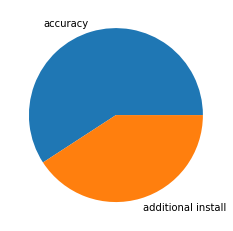

In [105]:
data=[a,b]
categories=['accuracy','additional install']
plt.pie(data,labels=categories)
plt.show()

# 센서 좌표 위치 선별

# 미세먼지 센서 설치 위치 리스트 작성

In [106]:
dust_list=anyang_cctv_dust_all
dust_list=dust_list.replace({'EMD_KOR_NM': '석수동'}, {'EMD_KOR_NM': '경기도 안양시 만안구 석수동'})
dust_list=dust_list.replace({'EMD_KOR_NM': '안양동'}, {'EMD_KOR_NM': '경기도 안양시 만안구 안양동'})
dust_list=dust_list.replace({'EMD_KOR_NM': '비산동'}, {'EMD_KOR_NM': '경기도 안양시 동안구 비산동'})
dust_list=dust_list.replace({'EMD_KOR_NM': '호계동'}, {'EMD_KOR_NM': '경기도 안양시 동안구 호계동'})
dust_list=dust_list.replace({'EMD_KOR_NM': '평촌동'}, {'EMD_KOR_NM': '경기도 안양시 동안구 평촌동'})
dust_list=dust_list.rename({"EMD_KOR_NM":'주소(동명 포함)'},axis=1)
dust_list=dust_list.rename({"lon":'X좌표(경도)'},axis=1)
dust_list=dust_list.rename({"lat":'Y좌표(위도)'},axis=1)
dust_list=dust_list.reset_index()
dust_list=dust_list.sort_values(by='dust',ascending=False)
dust_list['순위']=np.arange(1,41)
dust_list=dust_list[['순위','주소(동명 포함)','X좌표(경도)','Y좌표(위도)']]

# 복합 센서 설치 위치 리스트 작성

In [107]:
complex_list=anyang_cctv_complex_all
complex_list=complex_list.replace({'EMD_KOR_NM': '석수동'}, {'EMD_KOR_NM': '경기도 안양시 만안구 석수동'})
complex_list=complex_list.replace({'EMD_KOR_NM': '안양동'}, {'EMD_KOR_NM': '경기도 안양시 만안구 안양동'})
complex_list=complex_list.replace({'EMD_KOR_NM': '비산동'}, {'EMD_KOR_NM': '경기도 안양시 동안구 비산동'})
complex_list=complex_list.replace({'EMD_KOR_NM': '호계동'}, {'EMD_KOR_NM': '경기도 안양시 동안구 호계동'})
complex_list=complex_list.replace({'EMD_KOR_NM': '평촌동'}, {'EMD_KOR_NM': '경기도 안양시 동안구 평촌동'})
complex_list=complex_list.replace({'EMD_KOR_NM': '박달동'}, {'EMD_KOR_NM': '경기도 안양시 만안구 박달동'})
complex_list=complex_list.replace({'EMD_KOR_NM': '관양동'}, {'EMD_KOR_NM': '경기도 안양시 동안구 관양동'})
complex_list=complex_list.rename({"EMD_KOR_NM":'주소(동명 포함)'},axis=1)
complex_list=complex_list.rename({"lon":'X좌표(경도)'},axis=1)
complex_list=complex_list.rename({"lat":'Y좌표(위도)'},axis=1)
complex_list=complex_list.reset_index()
complex_list=complex_list.sort_values(by='point',ascending=False)
complex_list['순위']=np.arange(1,81)
complex_list=complex_list[['순위','주소(동명 포함)','X좌표(경도)','Y좌표(위도)']]

# 리스트 파일로 저장

In [108]:
dust_list=dust_list.to_csv("dust_list.csv",encoding='utf-8')

In [109]:
complex_list=complex_list.to_csv("complex_list.csv",encoding='utf-8')